Roy Kyung In Oh 

Nathan Shack 

Camila Dal Bello

Adam Changjiang Dong 


# Social media posts from high profile people and stock prices.

## Introduction

In the past few years, the method of how information is spread has shifted dramatically. The rise of social media platforms has not only changed how individuals communicate but has also created new way for financial influence. In a world increasingly interconnected, social media posts from influential people can traverse the globe instantaneously, reaching millions of followers ready to act upon the insights shared. Prominent celebrities, financial gurus, and politicians often take to platforms like Twitter, currently known as X, to express their opinions, which can range from casual commentary to significant announcements. The weight of their words has the potential to cause substantial fluctuations in the stock market.

The phenomenon raises an intriguing question: what relations do tweets from these high-profile individuals have with stock prices? This is not only a question of academic interest but also a practical subject for investors and market analysts. In this analysis, we aim to dig the relationship between social media influence and market movements. By examining datasets of tweets related and from well-known people alongside stock price trajectories, we seek to uncover patterns and correlations.

As we embark on this exploration, we consider the implications of our findings for the future of financial market regulation, the responsibility of influential figures in the public discourse, and the strategies investors might adopt in this new era of information flow.

## Libraries

We install and import all the libraries needed for this project.

In [1]:
!pip install yfinance 
!pip install nltk
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
from datetime import datetime
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV

# Some libraries I thought we would need to use.
# Please feel free to add more that are needed

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 1.4 MB/s eta 0:00:00a 0:00:01
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 13.4 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Using cached frozendict-2.4.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (116 kB)
  Created wheel for peewee: filename=peewee-3.17.3-cp310-cp310-linux_x86_64.whl size=275204 sha256=4e13e168995a2fbae86bf1416755de36cba4046c11bcc0eb287c260423c819d5
  Stored in directory: /home/jovyan/.cache/pip/wheels/ae/8c/86/590a31ee9a1ad7c9305de67f66949031988bc64e19c279b71c
Successfully built peewee
  Attempting uninstall: requests
    Found existing installation: requests 2.28.2
    Uninstalling requests-

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


We create a function that cleans the content of the tweet, since there are irrelevant information.

In [2]:
# Clean the 'Tweets' column
def clean_tweet(text):
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    text = re.sub(r'\@\w+|\#','', text)
    # Remove special characters, numbers, punctuations
    text = re.sub(r"[^a-zA-Z']", " ", text)
    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

## Cleaning data for Elon Musk

In [3]:
musk_data = pd.read_csv("elonmusk.csv")

Shown below the tweets have emojis, @, and usernames that aren't as useful in our analysis. Hence, we clean it with the function above. 

In [4]:
musk_data.head()

,Tweets,Retweets,Likes,Date
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00
3,@BillyM2k 👻,802,19353,2022-10-27 02:32:48
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32


We apply the clean_tweet function and also make the data set into lower case for convenience.

In addition, we make a copy of the data set for different uses that will be showcased throughout the project.

In [5]:
musk_data['Date'] = pd.to_datetime(musk_data['Date'])

musk_data['Tweets'] = musk_data['Tweets'].apply(clean_tweet)

musk_data['Tweets'] = musk_data['Tweets'].str.lower()

musk_data.columns = musk_data.columns.str.lower()

musk = musk_data.copy()

musk_data.head()

,tweets,retweets,likes,date
0,thanks,209,7021,2022-10-27 16:17:39
1,absolutely,755,26737,2022-10-27 13:19:25
2,dear twitter advertisers,55927,356623,2022-10-27 13:08:00
3,,802,19353,2022-10-27 02:32:48
4,meeting a lot of cool people at twitter today,9366,195546,2022-10-26 21:39:32


To show an example visualization that our cleaned data can be used, we plot the frequency of tweets over time by months.

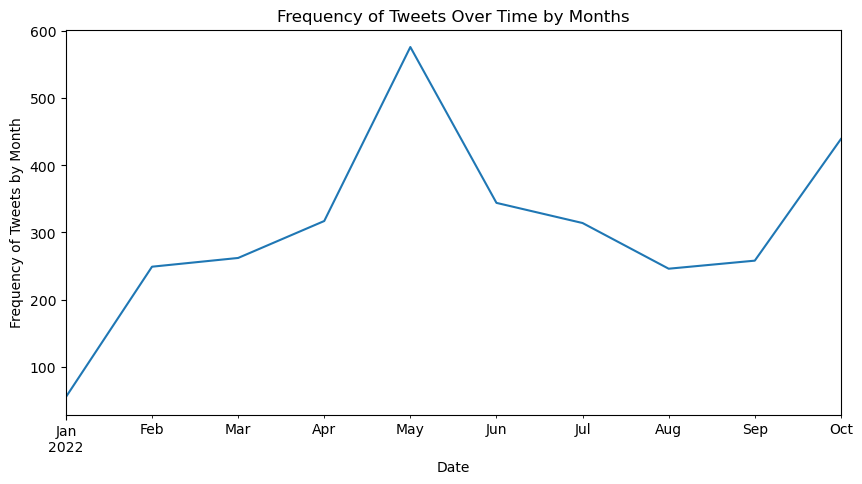

In [6]:
musk_data.set_index('date', inplace=True)

frequency = musk_data.resample('M').size()

plt.figure(figsize=(10,5))
frequency.plot()

plt.xlabel('Date')
plt.ylabel('Frequency of Tweets by Month')
plt.title('Frequency of Tweets Over Time by Months')

plt.show()

## Elon Musk Tweet's impact on Tesla Stock Price

 Let's look at a specific use case of one of Elon Musk's tweets on the change in Tesla's stock price. It is difficult to analyze causation from a single tweet's impact on the stock price, however, there is enough of a significant impact and correlation that it should be referenced. 

On November 6th 2021, Elon Musk tweeted a poll that said "Much is made lately of unrealized gains being a means of tax avoidance, so I propose selling 10% of my Tesla stock. Do you support this?" The tweet had a yes or no poll where his followers could show their "support" in selling his Tesla stock. Elon Musk tweeted this on a Saturday (the stock market was not open). Let's look at how this tweet had an impact on Tesla stock price before and after he tweeted on November 6th. 

In [7]:
#Since November 6, 2021 was a Saturday, we'll look at data from the surrounding days
start_date = "2021-11-04"  # Friday before the tweet
end_date = "2021-11-09"    # Monday after the tweet

tickers = ['TSLA']

df_list = []

for ticker in tickers:
    # Download data for the specified date range
    data = yf.download(ticker, start=start_date, end=end_date)
    df_list.append(data)

df_tweet = pd.concat(df_list, keys=tickers, names=['Ticker', 'Date'])
df_tweet = df_tweet.reset_index()

# Print the head of the dataframe to check the first few rows
df_tweet.head()


[*********************100%%**********************]  1 of 1 completed


,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,TSLA,2021-11-04,411.470001,414.496674,405.666656,409.970001,409.970001,76192200
1,TSLA,2021-11-05,409.333344,413.290009,402.666656,407.363342,407.363342,64886400
2,TSLA,2021-11-08,383.263336,399.000000,377.666656,387.646667,387.646667,100337100


Here we can see that stock price was around 407 dollars a share on November 5th(before tweet) and 388 dollars a share on November 8th(after tweet). We can also see a substantial increase in shares traded per day. This could infer that there is a lot of selling pressure of Tesla stock during this time. 

It's possible that the decrease in Tesla stock could be due to overall market conditions and not Elon Musk's tweet. We found another stock, Lucid Group, that is highly correlated to Tesla. Lucid Group is an American manufacturer of luxury electric vehicles which is the same market as Tesla.

In [8]:
#Since November 6, 2021 was a Saturday, we'll look at data from the surrounding days
start_date = "2021-11-04"  # Friday before the tweet
end_date = "2021-11-09"    # Monday after the tweet

tickers = ['LCID']

df_list = []

for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    df_list.append(data)

df_lucid_tweet = pd.concat(df_list, keys=tickers, names=['Ticker', 'Date'])
df_lucid_tweet = df_lucid_tweet.reset_index()

df_lucid_tweet.head()


[*********************100%%**********************]  1 of 1 completed


,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,LCID,2021-11-04,37.380001,37.700001,36.070000,37.119999,37.119999,40730400
1,LCID,2021-11-05,37.500000,41.919998,36.169998,41.799999,41.799999,113881100
2,LCID,2021-11-08,43.540001,47.869999,43.040001,45.919998,45.919998,154195400


 Now, let's look at the percent increase in stock price of Lucid and Tesla during the same time frame of before and after Elon Musk's tweet.

/tmp/ipykernel_319/2760074082.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


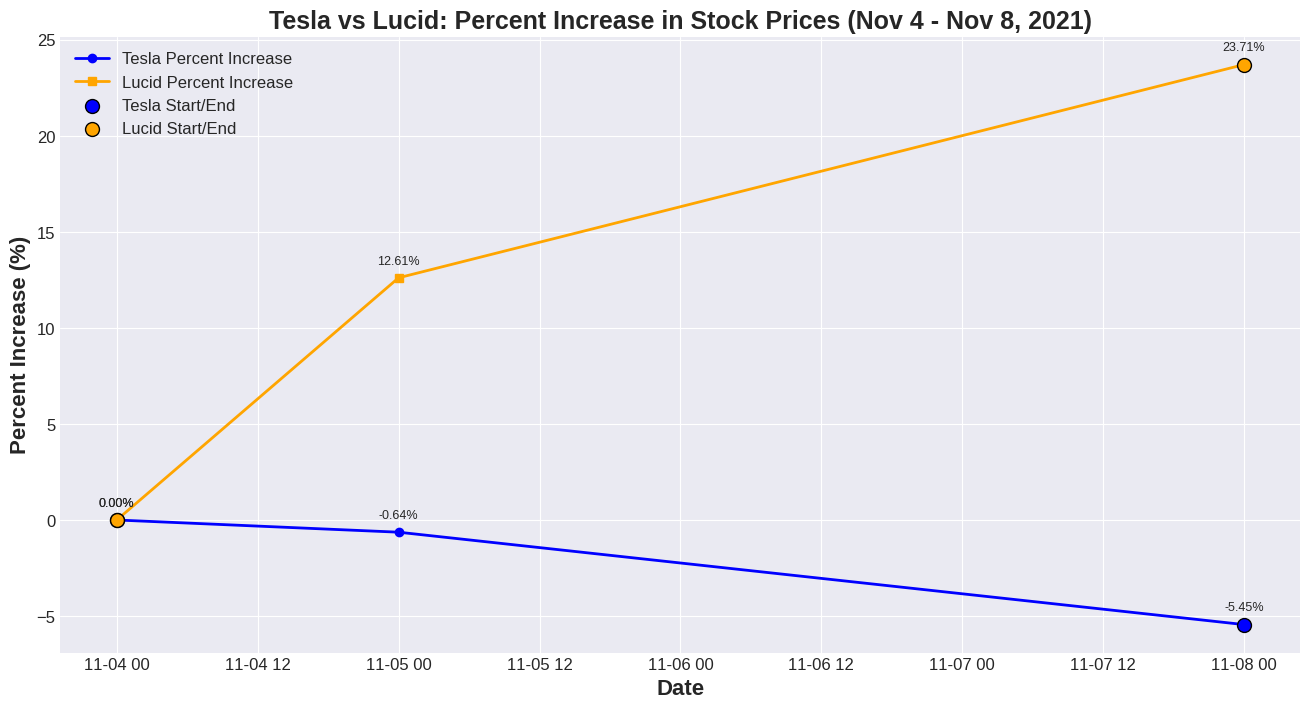

In [9]:
initial_tesla_close = df_tweet['Close'][0]
initial_lucid_close = df_lucid_tweet['Close'][0]


df_tweet['Percent Increase'] = (df_tweet['Close'] - initial_tesla_close) / initial_tesla_close * 100
df_lucid_tweet['Percent Increase'] = (df_lucid_tweet['Close'] - initial_lucid_close) / initial_lucid_close * 100


plt.figure(figsize=(16, 8), facecolor='white')
plt.style.use('seaborn-darkgrid')

plt.plot(df_tweet['Date'], df_tweet['Percent Increase'], label='Tesla Percent Increase',
         color='blue', linewidth=2, marker='o')

plt.plot(df_lucid_tweet['Date'], df_lucid_tweet['Percent Increase'], label='Lucid Percent Increase',
         color='orange', linewidth=2, marker='s')


plt.scatter(df_tweet['Date'].iloc[[0, -1]], df_tweet['Percent Increase'].iloc[[0, -1]],
            color='blue', zorder=5, s=100, label='Tesla Start/End', edgecolors='black')
plt.scatter(df_lucid_tweet['Date'].iloc[[0, -1]], df_lucid_tweet['Percent Increase'].iloc[[0, -1]],
            color='orange', zorder=5, s=100, label='Lucid Start/End', edgecolors='black')

for i in range(len(df_tweet)):
    plt.annotate(f"{df_tweet['Percent Increase'][i]:.2f}%", 
                 (df_tweet['Date'][i], df_tweet['Percent Increase'][i]), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center', 
                 fontsize=9)

for i in range(len(df_lucid_tweet)):
    plt.annotate(f"{df_lucid_tweet['Percent Increase'][i]:.2f}%", 
                 (df_lucid_tweet['Date'][i], df_lucid_tweet['Percent Increase'][i]), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center', 
                 fontsize=9)

# Title and labels
plt.title('Tesla vs Lucid: Percent Increase in Stock Prices (Nov 4 - Nov 8, 2021)', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=16, fontweight='bold')
plt.ylabel('Percent Increase (%)', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(shadow=True, fontsize=12)

# This line is to display the plot when running the script
plt.show()

As we can see, Lucid stock had an almost opposite effect as Tesla. The price increased a substantial amount from before and after Elon Musk's tweet compared to Tesla . Next, let's run a correlation test to see how correlated the two stocks are. We'll run two correlation tests for 2021 and the days before and after the tweet for the sake of simplicity. Note that we start at August because Lucid was not publicly traded until then. 

Now, let's see if there was any anomalies with the actual market during that time.

In [10]:
start_date = "2021-11-4" 
end_date = "2021-11-09" 

tickers = ['^GSPC']

df_list = []

for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    df_list.append(data)

df_sp500 = pd.concat(df_list, keys=tickers, names=['Ticker', 'Date'])
df_sp500 = df_sp500.reset_index()
print(df_sp500)

[*********************100%%**********************]  1 of 1 completed

  Ticker       Date         Open         High          Low        Close  \
0  ^GSPC 2021-11-04  4662.930176  4683.000000  4662.589844  4680.060059   
1  ^GSPC 2021-11-05  4699.259766  4718.500000  4681.319824  4697.529785   
2  ^GSPC 2021-11-08  4701.479980  4714.919922  4694.390137  4701.700195   

     Adj Close      Volume  
0  4680.060059  4462300000  
1  4697.529785  4467180000  
2  4701.700195  4269710000  


/tmp/ipykernel_319/4274601172.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


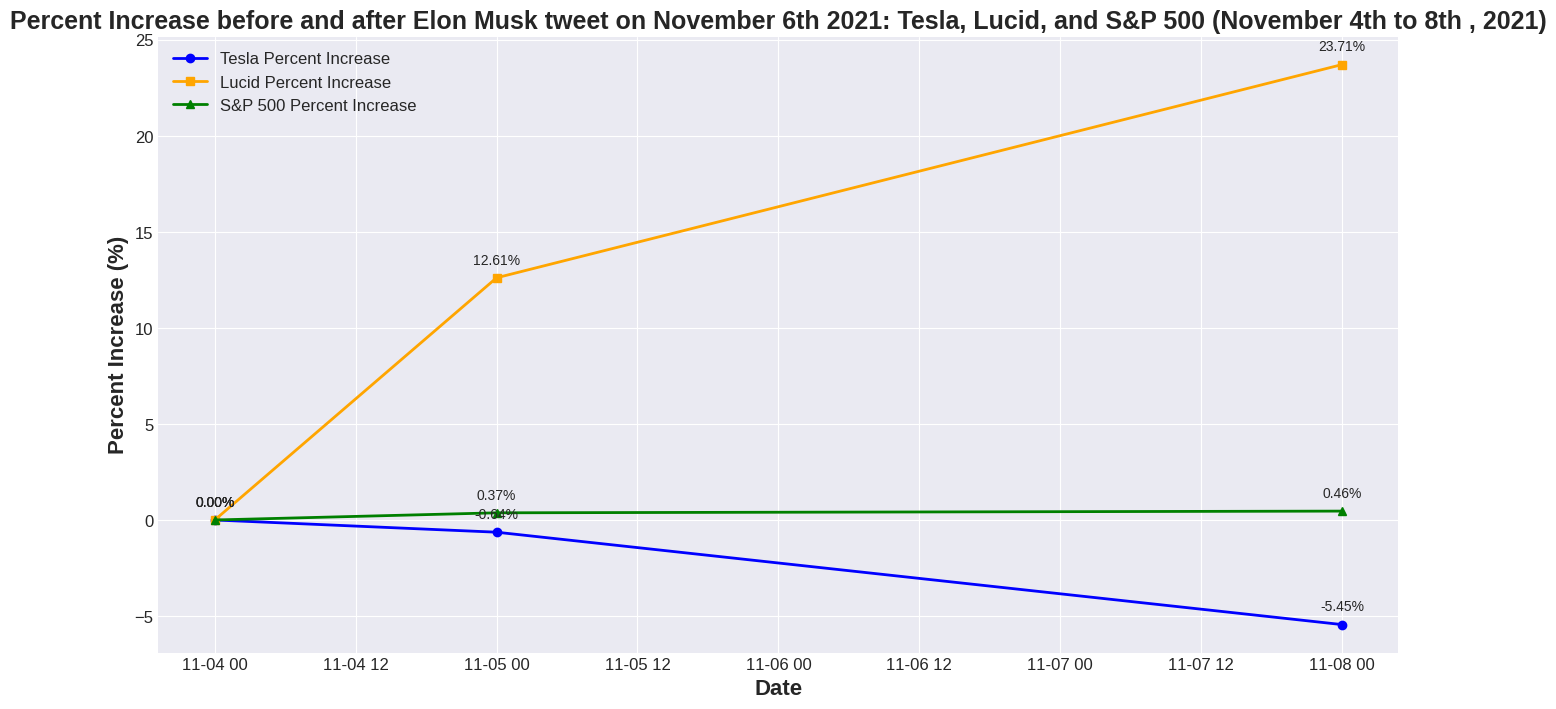

In [11]:

initial_tesla_close = df_tweet['Close'][0]
initial_lucid_close = df_lucid_tweet['Close'][0]
initial_sp500_close = df_sp500['Close'][0]

df_tweet['Percent Increase'] = (df_tweet['Close'] - initial_tesla_close) / initial_tesla_close * 100
df_lucid_tweet['Percent Increase'] = (df_lucid_tweet['Close'] - initial_lucid_close) / initial_lucid_close * 100
df_sp500['Percent Increase'] = (df_sp500['Close'] - initial_sp500_close) / initial_sp500_close * 100


plt.figure(figsize=(16, 8), facecolor='white')
plt.style.use('seaborn-darkgrid')


plt.plot(df_tweet['Date'], df_tweet['Percent Increase'], label='Tesla Percent Increase', color='blue', linewidth=2, marker='o')
for i, txt in enumerate(df_tweet['Percent Increase']):
    plt.annotate(f"{txt:.2f}%", (df_tweet['Date'].iloc[i], df_tweet['Percent Increase'].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')


plt.plot(df_lucid_tweet['Date'], df_lucid_tweet['Percent Increase'], label='Lucid Percent Increase', color='orange', linewidth=2, marker='s')
for i, txt in enumerate(df_lucid_tweet['Percent Increase']):
    plt.annotate(f"{txt:.2f}%", (df_lucid_tweet['Date'].iloc[i], df_lucid_tweet['Percent Increase'].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')


plt.plot(df_sp500['Date'], df_sp500['Percent Increase'], label='S&P 500 Percent Increase', color='green', linewidth=2, marker='^')
for i, txt in enumerate(df_sp500['Percent Increase']):
    plt.annotate(f"{txt:.2f}%", (df_sp500['Date'].iloc[i], df_sp500['Percent Increase'].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')


plt.title('Percent Increase before and after Elon Musk tweet on November 6th 2021: Tesla, Lucid, and S&P 500 (November 4th to 8th , 2021)', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=16, fontweight='bold')
plt.ylabel('Percent Increase (%)', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(shadow=True, fontsize=12)

plt.show()


Although it is a small window, we can see that the market does not fluctuate in price during this team. Therefore, we can assume that there is no outside general noise that would affect the entire stock market. 

In [12]:
tickers = ['TSLA', 'LCID']
#correlation test for 2021
start_date = '2021-08-01'
end_date = '2021-12-31'

data = yf.download(tickers, start=start_date, end=end_date)

closing_prices = data['Close']

correlation_matrix = closing_prices.corr()

correlation_matrix

[*********************100%%**********************]  2 of 2 completed


Ticker,LCID,TSLA
Ticker,,
LCID,1.00000,0.85726
TSLA,0.85726,1.00000


In [13]:
tickers = ['TSLA', 'LCID']
#correlation test for before and after the November 6th tweet
start_date = '2021-11-04'
end_date = '2021-11-09'
data = yf.download(tickers, start=start_date, end=end_date)

closing_prices = data['Close']

correlation_matrix = closing_prices.corr()

correlation_matrix

[*********************100%%**********************]  2 of 2 completed


Ticker,LCID,TSLA
Ticker,,
LCID,1.00000,-0.89899
TSLA,-0.89899,1.00000


Therefore, the two stocks are usually positively correlated for 2021. This makes intuitive sense because both companies have the largest market cap in the Electric Car market. Therefore, it is strange that two stocks move in opposite directions from November 5th to 8th.

Let's create a visualization to showcases how correlated the two stocks are in 2021. This also showcases how there is a huge gap in November. 

In [14]:
start_date = "2021-8-01" 
end_date = "2021-12-31"   

tickers = ['TSLA']

df_list = []

for ticker in tickers:
    # Download data for the specified date range
    data = yf.download(ticker, start=start_date, end=end_date)
    df_list.append(data)

df = pd.concat(df_list, keys=tickers, names=['Ticker', 'Date'])
df = df.reset_index()

# Print the head of the dataframe to check the first few rows
print(df.head())

start_date = "2021-8-01" 
end_date = "2021-12-31"   

tickers = ['LCID']

df_list = []

for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    df_list.append(data)

df_lucid = pd.concat(df_list, keys=tickers, names=['Ticker', 'Date'])
df_lucid = df_lucid.reset_index()

df_lucid.head()



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

  Ticker       Date        Open        High         Low       Close  \
0   TSLA 2021-08-02  233.333328  242.313339  232.800003  236.556671   
1   TSLA 2021-08-03  239.666672  240.883331  233.669998  236.580002   
2   TSLA 2021-08-04  237.000000  241.633331  236.309998  236.973328   
3   TSLA 2021-08-05  238.666672  240.316666  237.136673  238.210007   
4   TSLA 2021-08-06  237.300003  238.776672  232.543335  233.033340   

    Adj Close     Volume  
0  236.556671  100847400  
1  236.580002   64860900  
2  236.973328   51007800  
3  238.210007   38758800  
4  233.033340   46869000  


,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,LCID,2021-08-02,24.193001,24.240000,23.450001,23.770000,23.770000,7894400
1,LCID,2021-08-03,23.930000,23.950001,22.955000,23.580000,23.580000,8579400
2,LCID,2021-08-04,23.480000,23.490000,22.540001,22.629999,22.629999,7015100
3,LCID,2021-08-05,22.920000,23.290001,22.700001,22.750000,22.750000,6573600
4,LCID,2021-08-06,22.934999,23.910000,22.799999,23.379999,23.379999,7686500


/tmp/ipykernel_319/213244916.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


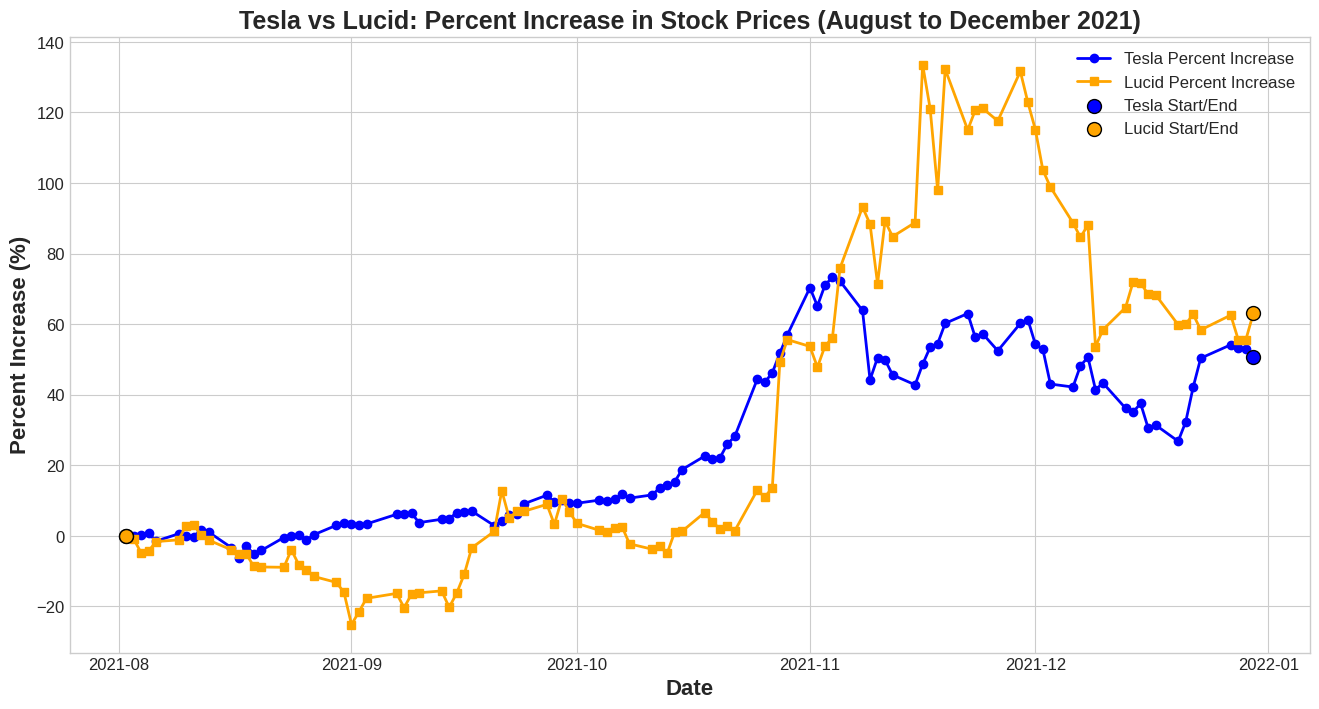

In [15]:
initial_tesla_close = df['Close'][0]
initial_lucid_close = df_lucid['Close'][0]


df['Percent Increase'] = (df['Close'] - initial_tesla_close) / initial_tesla_close * 100
df_lucid['Percent Increase'] = (df_lucid['Close'] - initial_lucid_close) / initial_lucid_close * 100

plt.figure(figsize=(16, 8), facecolor='white')
plt.style.use('seaborn-whitegrid')

plt.plot(df['Date'], df['Percent Increase'], label='Tesla Percent Increase',
         color='blue', linewidth=2, marker='o')

plt.plot(df_lucid['Date'], df_lucid['Percent Increase'], label='Lucid Percent Increase',
         color='orange', linewidth=2, marker='s')
plt.scatter(df['Date'].iloc[[0, -1]], df['Percent Increase'].iloc[[0, -1]],
            color='blue', zorder=5, s=100, label='Tesla Start/End', edgecolors='black')
plt.scatter(df['Date'].iloc[[0, -1]], df_lucid['Percent Increase'].iloc[[0, -1]],
            color='orange', zorder=5, s=100, label='Lucid Start/End', edgecolors='black')


plt.title('Tesla vs Lucid: Percent Increase in Stock Prices (August to December 2021)', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=16, fontweight='bold')
plt.ylabel('Percent Increase (%)', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(shadow=True, fontsize=12)

It's possible that this is a coincidence and there was other external factors affecting the stock price Lucid from November 4th to 8th. The only information that I could find online was that Lucid announced on November 5th that they are opening another studio in the Washington, D.C., Metro Area. The news could have had a positive impact on the price of the stock. Let's test this analysis by comparing the price of Lucid stock vs Tesla when they've announced other studio openings. It's difficult to do a 1 for 1 analysis on different openings because of numerous other factors but let's look at two other announcements of studio openings for simplicity sake. The two studio openings we'll be looking at is the Arizona Studio announced it was opening in August of 2021 and Newport California in July of 2022. Let's compare the stock prices of Tesla and Lucid during the announcements

### Announcement of opening new studio on August 6th of 2021

In [16]:
start_date = "2021-8-04"  
end_date = "2021-8-10"  

tickers = ['TSLA']

df_list = []

for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    df_list.append(data)

df_august_tesla = pd.concat(df_list, keys=tickers, names=['Ticker', 'Date'])
df_august_tesla = df_august_tesla.reset_index()


start_date = "2021-8-04" 
end_date = "2021-8-10" 

tickers = ['LCID']

df_list = []

for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    df_list.append(data)

df_august_lucid = pd.concat(df_list, keys=tickers, names=['Ticker', 'Date'])
df_august_lucid = df_august_lucid.reset_index()

print(df_august_tesla)
print(df_august_lucid)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

  Ticker       Date        Open        High         Low       Close  \
0   TSLA 2021-08-04  237.000000  241.633331  236.309998  236.973328   
1   TSLA 2021-08-05  238.666672  240.316666  237.136673  238.210007   
2   TSLA 2021-08-06  237.300003  238.776672  232.543335  233.033340   
3   TSLA 2021-08-09  236.723328  239.676666  235.043335  237.919998   

    Adj Close    Volume  
0  236.973328  51007800  
1  238.210007  38758800  
2  233.033340  46869000  
3  237.919998  44145900  
  Ticker       Date       Open       High        Low      Close  Adj Close  \
0   LCID 2021-08-04  23.480000  23.490000  22.540001  22.629999  22.629999   
1   LCID 2021-08-05  22.920000  23.290001  22.700001  22.750000  22.750000   
2   LCID 2021-08-06  22.934999  23.910000  22.799999  23.379999  23.379999   
3   LCID 2021-08-09  23.400000  23.620001  23.030001  23.500000  23.500000   

    Volume  
0  7015100  
1  6573600  
2  7686500  
3  6489600  


/tmp/ipykernel_319/1350313908.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


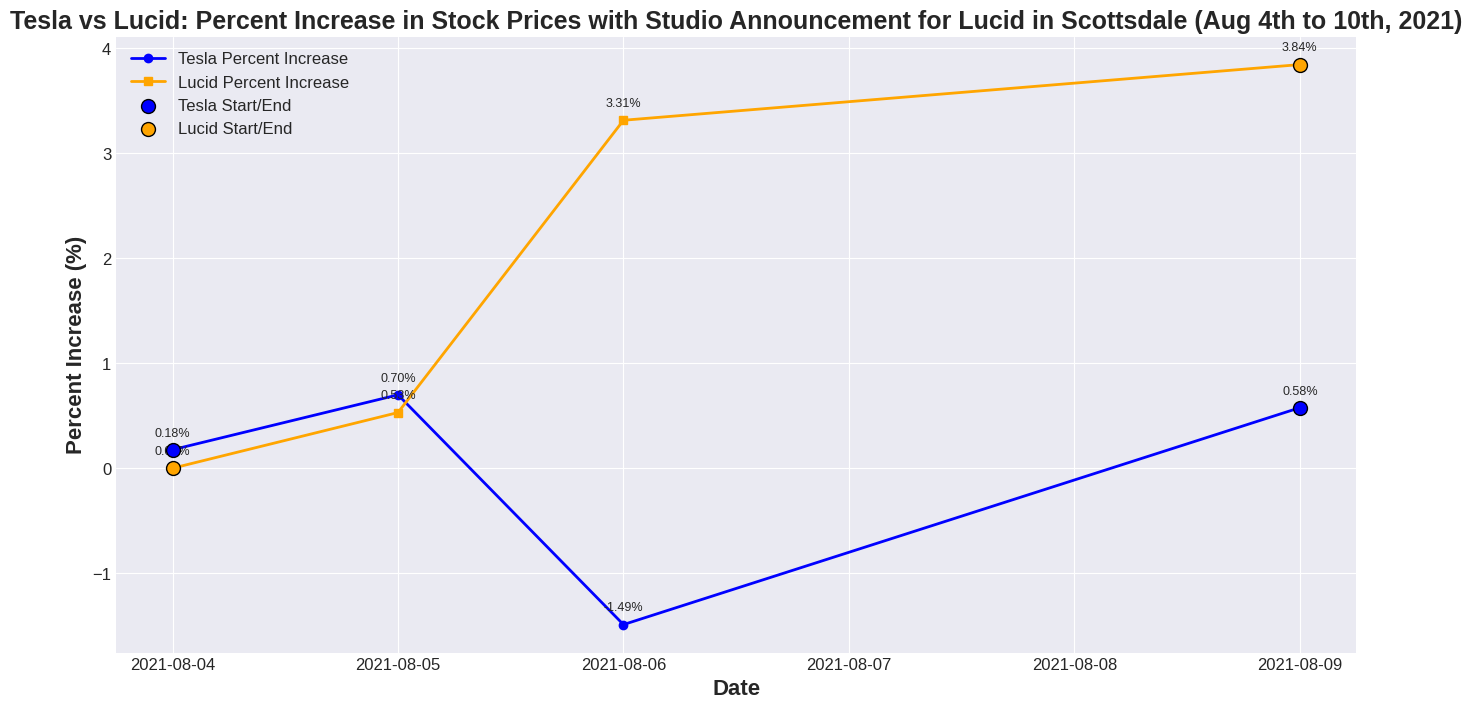

In [17]:
nitial_tesla_close = df_august_tesla['Close'][0]
initial_lucid_close = df_august_lucid['Close'][0]

df_august_tesla['Percent Increase'] = (df_august_tesla['Close'] - initial_tesla_close) / initial_tesla_close * 100
df_august_lucid['Percent Increase'] = (df_august_lucid['Close'] - initial_lucid_close) / initial_lucid_close * 100

plt.figure(figsize=(16, 8), facecolor='white')
plt.style.use('seaborn-darkgrid')

plt.plot(df_august_tesla['Date'], df_august_tesla['Percent Increase'], label='Tesla Percent Increase',
         color='blue', linewidth=2, marker='o')

plt.plot(df_august_lucid['Date'], df_august_lucid['Percent Increase'], label='Lucid Percent Increase',
         color='orange', linewidth=2, marker='s')

plt.scatter(df_august_tesla['Date'].iloc[[0, -1]], df_august_tesla['Percent Increase'].iloc[[0, -1]],
            color='blue', zorder=5, s=100, label='Tesla Start/End', edgecolors='black')
plt.scatter(df_august_lucid['Date'].iloc[[0, -1]], df_august_lucid['Percent Increase'].iloc[[0, -1]],
            color='orange', zorder=5, s=100, label='Lucid Start/End', edgecolors='black')

for i in range(len(df_august_tesla)):
    plt.annotate(f"{df_august_tesla['Percent Increase'][i]:.2f}%", 
                 (df_august_tesla['Date'][i], df_august_tesla['Percent Increase'][i]), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center', 
                 fontsize=9)

for i in range(len(df_august_lucid)):
    plt.annotate(f"{df_august_lucid['Percent Increase'][i]:.2f}%", 
                 (df_august_lucid['Date'][i], df_august_lucid['Percent Increase'][i]), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center', 
                 fontsize=9)
    
plt.title('Tesla vs Lucid: Percent Increase in Stock Prices with Studio Announcement for Lucid in Scottsdale (Aug 4th to 10th, 2021)', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=16, fontweight='bold')
plt.ylabel('Percent Increase (%)', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(shadow=True, fontsize=12)

plt.show()

Here is the percent change of the stock prices from August 4th 2021 to August 9th 2021. We can see that there is an increase in the stock price of Lucid and a decrease in Tesla. However, it is not as a drastic as a change as November 6th 2021(Elon Musk's Tweet). Again, it is hard to say with certainty that this was only the studio announcement that caused the decrease/increase in stock prices because there are numerous things that affect the change in a stock price. Nevertheless, it shows that this studio announcement did not seem to have a big impact on the price of the stock. Now, let's look at the correlation of the stock prices from August 4th to 9th.

In [18]:
tickers = ['TSLA', 'LCID']


start_date = '2021-8-04'
end_date = '2021-8-10'


data = yf.download(tickers, start=start_date, end=end_date)


closing_prices = data['Close']

correlation_matrix = closing_prices.corr()

correlation_matrix

[*********************100%%**********************]  2 of 2 completed


Ticker,LCID,TSLA
Ticker,,
LCID,1.000000,-0.387184
TSLA,-0.387184,1.000000


There is still a negative correlation of the two stocks but is much weaker compared to November 4th to 9th(-0.39 vs -0.89). Therefore, we can say there is some correlation in Elon Musk's tweet having an impact on Tesla's and Lucid stock price if we are controlling for the studio announcement. Let's look at another studio opening announcement on January 6th 2022 to see if there is a significant impact on the stock prices during this period in time.

### Announcement of opening new studio in Newport, California on January 22nd 2022¶

In [19]:
start_date = "2022-1-25"  
end_date = "2022-2-02"  

tickers = ['TSLA']

df_list = []

for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    df_list.append(data)

df_jan_tesla = pd.concat(df_list, keys=tickers, names=['Ticker', 'Date'])
df_jan_tesla = df_jan_tesla.reset_index()


start_date = "2022-1-25" 
end_date = "2022-2-02" 

tickers = ['LCID']

df_list = []

for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    df_list.append(data)

df_jan_lucid = pd.concat(df_list, keys=tickers, names=['Ticker', 'Date'])
df_jan_lucid = df_jan_lucid.reset_index()

print(df_jan_tesla)
print(df_jan_lucid)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

  Ticker       Date        Open        High         Low       Close  \
0   TSLA 2022-01-25  304.733337  317.086670  301.070007  306.133331   
1   TSLA 2022-01-26  317.476654  329.230011  302.000000  312.470001   
2   TSLA 2022-01-27  311.119995  311.796661  276.333344  276.366669   
3   TSLA 2022-01-28  277.186676  285.833344  264.003326  282.116669   
4   TSLA 2022-01-31  290.903320  312.663330  287.350006  312.239990   
5   TSLA 2022-02-01  311.736664  314.566681  301.666656  310.416656   

    Adj Close     Volume  
0  306.133331   86595900  
1  312.470001  104867400  
2  276.366669  147109500  
3  282.116669  134789100  
4  312.239990  104436000  
5  310.416656   73138200  
  Ticker       Date       Open       High        Low      Close  Adj Close  \
0   LCID 2022-01-25  36.630001  37.549999  35.220001  35.459999  35.459999   
1   LCID 2022-01-26  36.290001  36.880001  32.990002  33.410000  33.410000   
2   LCID 2022-01-27  33.849998  33.910000  28.389999  28.700001  28.700001   
3

/tmp/ipykernel_319/3863420323.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


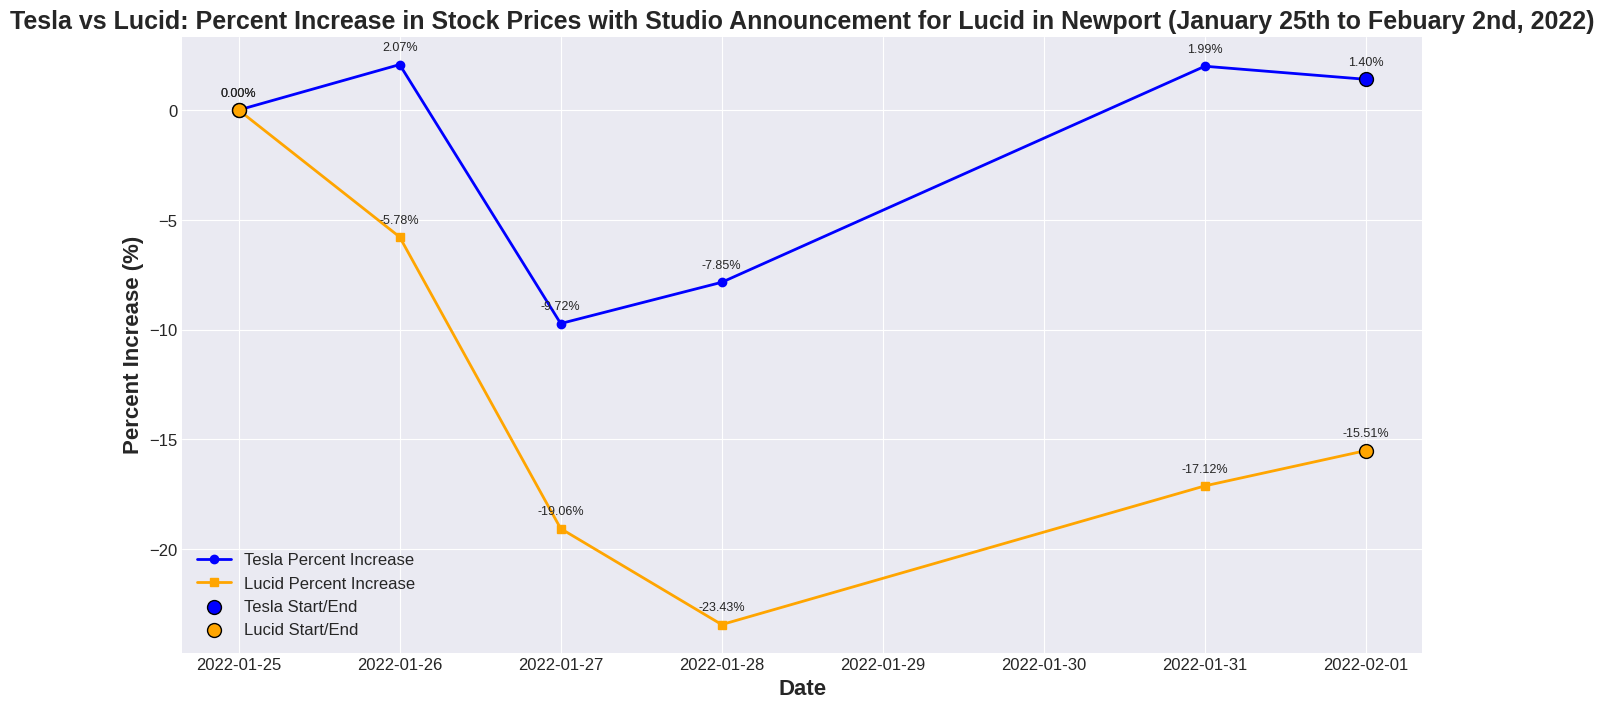

In [20]:
initial_tesla_close = df_jan_tesla['Close'][0]
initial_lucid_close = df_jan_lucid['Close'][0]

df_jan_tesla['Percent Increase'] = (df_jan_tesla['Close'] - initial_tesla_close) / initial_tesla_close * 100
df_jan_lucid['Percent Increase'] = (df_jan_lucid['Close'] - initial_lucid_close) / initial_lucid_close * 100

plt.figure(figsize=(16, 8), facecolor='white')
plt.style.use('seaborn-darkgrid')

plt.plot(df_jan_tesla['Date'], df_jan_tesla['Percent Increase'], label='Tesla Percent Increase',
         color='blue', linewidth=2, marker='o')

plt.plot(df_jan_lucid['Date'], df_jan_lucid['Percent Increase'], label='Lucid Percent Increase',
         color='orange', linewidth=2, marker='s')

plt.scatter(df_jan_tesla['Date'].iloc[[0, -1]], df_jan_tesla['Percent Increase'].iloc[[0, -1]],
            color='blue', zorder=5, s=100, label='Tesla Start/End', edgecolors='black')
plt.scatter(df_jan_lucid['Date'].iloc[[0, -1]], df_jan_lucid['Percent Increase'].iloc[[0, -1]],
            color='orange', zorder=5, s=100, label='Lucid Start/End', edgecolors='black')

for i in range(len(df_jan_tesla)):
    plt.annotate(f"{df_jan_tesla['Percent Increase'][i]:.2f}%", 
                 (df_jan_tesla['Date'][i], df_jan_tesla['Percent Increase'][i]), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center', 
                 fontsize=9)

for i in range(len(df_jan_lucid)):
    plt.annotate(f"{df_jan_lucid['Percent Increase'][i]:.2f}%", 
                 (df_jan_lucid['Date'][i], df_jan_lucid['Percent Increase'][i]), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center', 
                 fontsize=9)

plt.title('Tesla vs Lucid: Percent Increase in Stock Prices with Studio Announcement for Lucid in Newport (January 25th to Febuary 2nd, 2022)', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=16, fontweight='bold')
plt.ylabel('Percent Increase (%)', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(shadow=True, fontsize=12)


plt.show()


There is somewhat of an increase of the stock price on January 28th (The date of the announcement). However, we see both an increase in Tesla and Lucid during this time. Therefore, there could be external factors like the overall market increasing, Let's compare it with the S&P 500 to see if Lucid and Tesla are following market trends.

In [21]:
start_date = "2022-1-25" 
end_date = "2022-2-02" 

tickers = ['^GSPC']

df_list = []

for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    df_list.append(data)

df_jan_sp500 = pd.concat(df_list, keys=tickers, names=['Ticker', 'Date'])
df_jan_sp500 = df_jan_sp500.reset_index()
print(df_jan_sp500)

[*********************100%%**********************]  1 of 1 completed

  Ticker       Date         Open         High          Low        Close  \
0  ^GSPC 2022-01-25  4366.640137  4411.009766  4287.109863  4356.450195   
1  ^GSPC 2022-01-26  4408.430176  4453.229980  4304.799805  4349.930176   
2  ^GSPC 2022-01-27  4380.580078  4428.740234  4309.500000  4326.509766   
3  ^GSPC 2022-01-28  4336.189941  4432.720215  4292.459961  4431.850098   
4  ^GSPC 2022-01-31  4431.790039  4516.890137  4414.020020  4515.549805   
5  ^GSPC 2022-02-01  4519.569824  4550.490234  4483.529785  4546.540039   

     Adj Close      Volume  
0  4356.450195  5145050000  
1  4349.930176  5570640000  
2  4326.509766  5214200000  
3  4431.850098  5031090000  
4  4515.549805  5098610000  
5  4546.540039  4816830000  


/tmp/ipykernel_319/1181015794.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


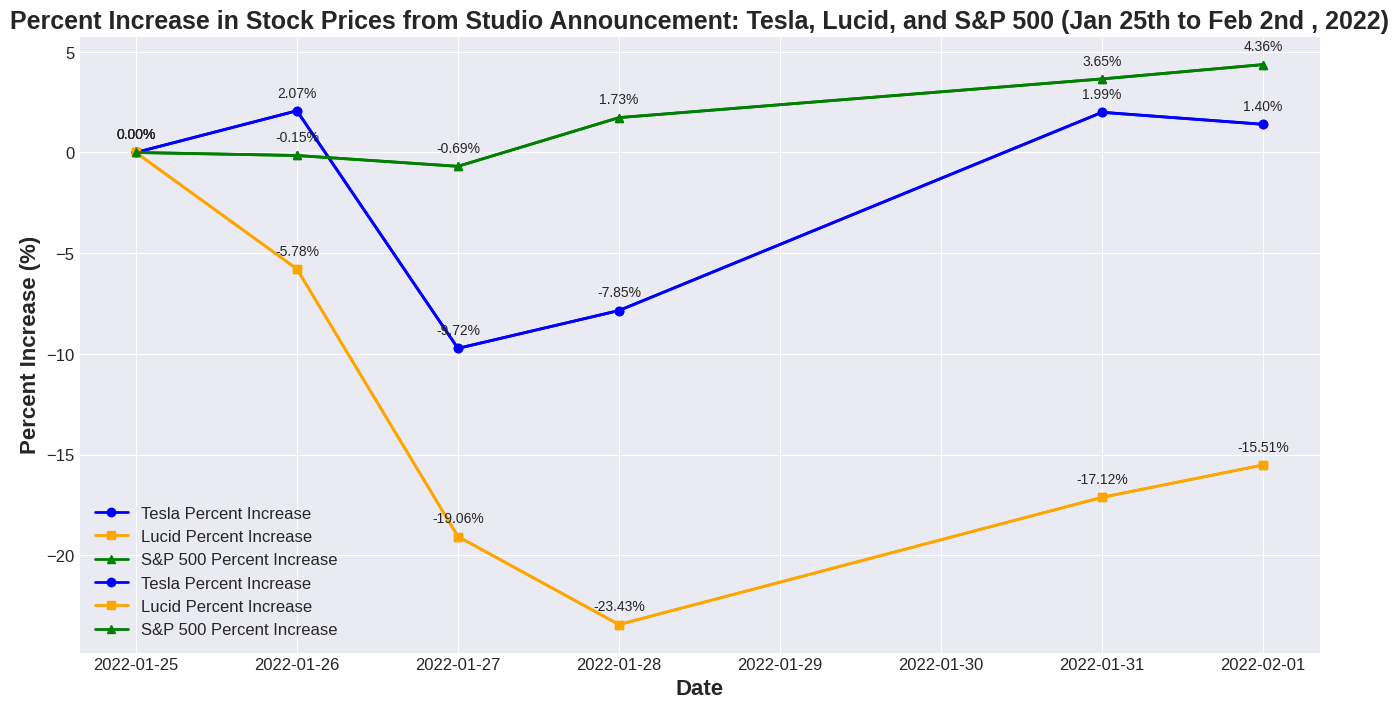

In [22]:
initial_tesla_close = df_jan_tesla['Close'][0]
initial_lucid_close = df_jan_lucid['Close'][0]
initial_sp500_close = df_jan_sp500['Close'][0]

df_jan_tesla['Percent Increase'] = (df_jan_tesla['Close'] - initial_tesla_close) / initial_tesla_close * 100
df_jan_lucid['Percent Increase'] = (df_jan_lucid['Close'] - initial_lucid_close) / initial_lucid_close * 100
df_jan_sp500['Percent Increase'] = (df_jan_sp500['Close'] - initial_sp500_close) / initial_sp500_close * 100

plt.figure(figsize=(16, 8), facecolor='white')
plt.style.use('seaborn-darkgrid')

plt.plot(df_jan_tesla['Date'], df_jan_tesla['Percent Increase'], label='Tesla Percent Increase', color='blue', linewidth=2, marker='o')
plt.plot(df_jan_lucid['Date'], df_jan_lucid['Percent Increase'], label='Lucid Percent Increase', color='orange', linewidth=2, marker='s')
plt.plot(df_jan_sp500['Date'], df_jan_sp500['Percent Increase'], label='S&P 500 Percent Increase', color='green', linewidth=2, marker='^')

plt.plot(df_jan_tesla['Date'], df_jan_tesla['Percent Increase'], label='Tesla Percent Increase', color='blue', linewidth=2, marker='o')
for i, txt in enumerate(df_jan_tesla['Percent Increase']):
    plt.annotate(f"{txt:.2f}%", (df_jan_tesla['Date'].iloc[i], df_jan_tesla['Percent Increase'].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')


plt.plot(df_jan_lucid['Date'], df_jan_lucid['Percent Increase'], label='Lucid Percent Increase', color='orange', linewidth=2, marker='s')
for i, txt in enumerate(df_jan_lucid['Percent Increase']):
    plt.annotate(f"{txt:.2f}%", (df_jan_lucid['Date'].iloc[i], df_jan_lucid['Percent Increase'].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')


plt.plot(df_jan_sp500['Date'], df_jan_sp500['Percent Increase'], label='S&P 500 Percent Increase', color='green', linewidth=2, marker='^')
for i, txt in enumerate(df_jan_sp500['Percent Increase']):
    plt.annotate(f"{txt:.2f}%", (df_jan_sp500['Date'].iloc[i], df_jan_sp500['Percent Increase'].iloc[i]), textcoords="offset points", xytext=(0,10), ha='center')


plt.title('Percent Increase in Stock Prices from Studio Announcement: Tesla, Lucid, and S&P 500 (Jan 25th to Feb 2nd , 2022)', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=16, fontweight='bold')
plt.ylabel('Percent Increase (%)', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(shadow=True, fontsize=12)

plt.show()


Therefore, we can see that there is a correlation with the market during the announcement of the new studio. This possibly shows that the studio announcement had relatively no impact on both prices of the stock. We should iterate that we are not saying that studio announcement is causing the price of the stock to go up our down. That would be impossible to state because there are so many confounding factors that influence the stock price. However, our main question is if there is hypothetically no studio announcement on November 5th 2021 would Tesla and Lucid have the same stock percent increase. I think we can say confidently that the studio announcement had relatively  little impact for the stock increase for Lucid and that Elon Musk's tweet both lead to a decrease in Tesla stock and an increase in Lucid stock. This is because investors may have been wary of the CEO of Tesla selling his shares and sold their stock to buy an another closely correlated electric vehicle, Lucid. 

## Cleaning data for Donald Trump

Now we explore the data for Donald Trump. We go through the same process as we did for the data for Elon Musk.

In [23]:
trump_data = pd.read_csv("trumptweets.csv")
trump_data.head()

,id,link,content,date,retweets,favorites,mentions,hashtags,geo
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,NaN,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,NaN,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,NaN,NaN,NaN
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24,NaN,NaN,NaN
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965,NaN,NaN,NaN


We match the columns and the names of the columns for persistence.

In [24]:
trump_data['date'] = pd.to_datetime(trump_data['date'])

trump_data['content'] = trump_data['content'].apply(clean_tweet)

trump_data.rename(columns={'content': 'tweets', 'favorites': 'likes'}, inplace=True)

trump_data = trump_data[['tweets', 'retweets', 'likes', 'date']]

trump = trump_data.copy()

trump_data.head()

,tweets,retweets,likes,date
0,Be sure to tune in and watch Donald Trump on L...,500,868,2009-05-04 20:54:25
1,Donald Trump will be appearing on The View tom...,33,273,2009-05-05 03:00:10
2,Donald Trump reads Top Ten Financial Tips on L...,12,18,2009-05-08 15:38:08
3,New Blog Post Celebrity Apprentice Finale and ...,11,24,2009-05-08 22:40:15
4,My persona will never be that of a wallflower ...,1399,1965,2009-05-12 16:07:28


In [25]:
trump_data['likes'].max()

857678

This time for an example visualization, we plot the monthly amount of likes by time. 

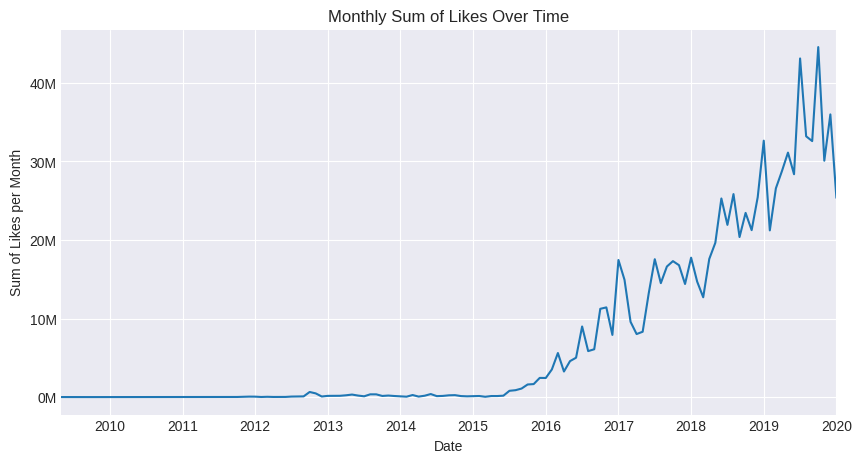

In [26]:
from matplotlib.ticker import FuncFormatter
def millions_formatter(x, pos):
    return f'{int(x / 1_000_000)}M'

trump_data.set_index('date', inplace=True)

likes_per_month = trump_data['likes'].resample('M').sum()

plt.figure(figsize=(10,5))
likes_per_month.plot()

plt.xlabel('Date')
plt.ylabel('Sum of Likes per Month')
plt.title('Monthly Sum of Likes Over Time')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.show()

Now that we have cleaned the data and observed some visualizations, we present the stock and its history that are related to each person.

Since our data date range for Donald Trump does not coincide with Trump Media, we use the S&P 500 index as a proxy for a stock related to Trump.

In [27]:
musk_recent_date = musk['date'].max()
musk_oldest_date = musk['date'].min()

trump_recent_date = trump['date'].max()
trump_oldest_date = trump['date'].min()

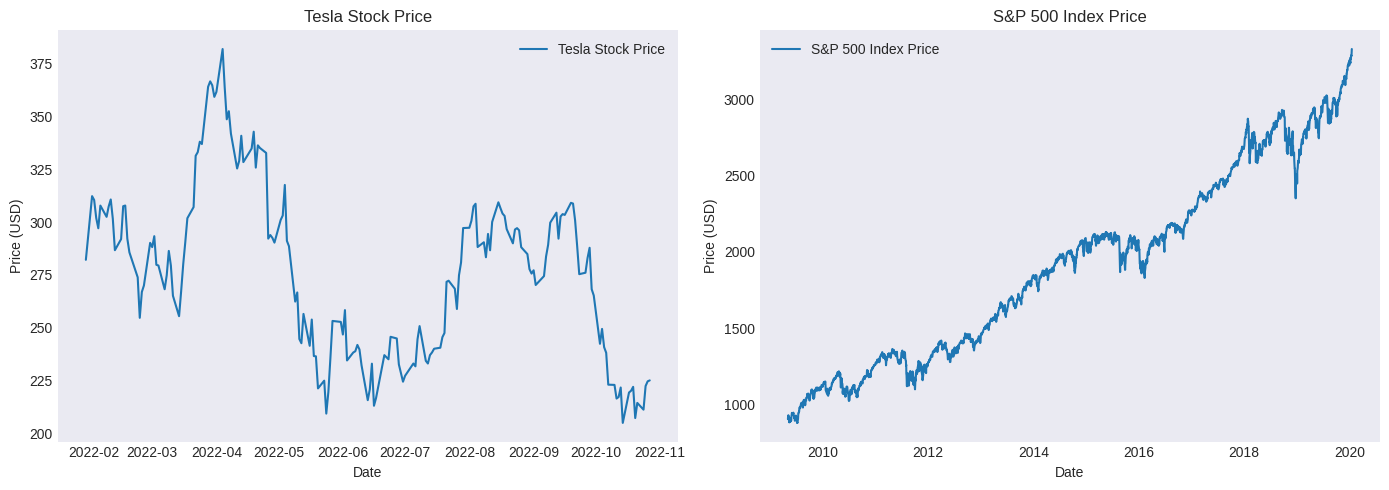

In [28]:
musk_ticker = 'TSLA'  # Tesla for Elon Musk
trump_ticker = '^GSPC'  # S&P 500 for Donald Trump

musk_data = yf.Ticker(musk_ticker)
trump_data = yf.Ticker(trump_ticker)

# Get the historical closing prices
musk_df = musk_data.history(period='1d', start=musk_oldest_date, end=musk_recent_date)
trump_df = trump_data.history(period='1d', start=trump_oldest_date, end=trump_recent_date)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# Tesla (Elon Musk) Plot
axes[0].plot(musk_df['Close'], label='Tesla Stock Price')
axes[0].set_title('Tesla Stock Price')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Price (USD)')
axes[0].legend()
axes[0].grid()

# S&P 500 (Donald Trump) Plot
axes[1].plot(trump_df['Close'], label='S&P 500 Index Price')
axes[1].set_title('S&P 500 Index Price')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Price (USD)')
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.show()


The range of S&P 500 looks too wide, making it difficult to observe the volatility and impacts. Moreover, we believe it would be a better proxy if Trump had a higher influence on the index. Hence, we shorten the range that coincides with Trump's serving years as the president of the United States. (2017 - 2021)

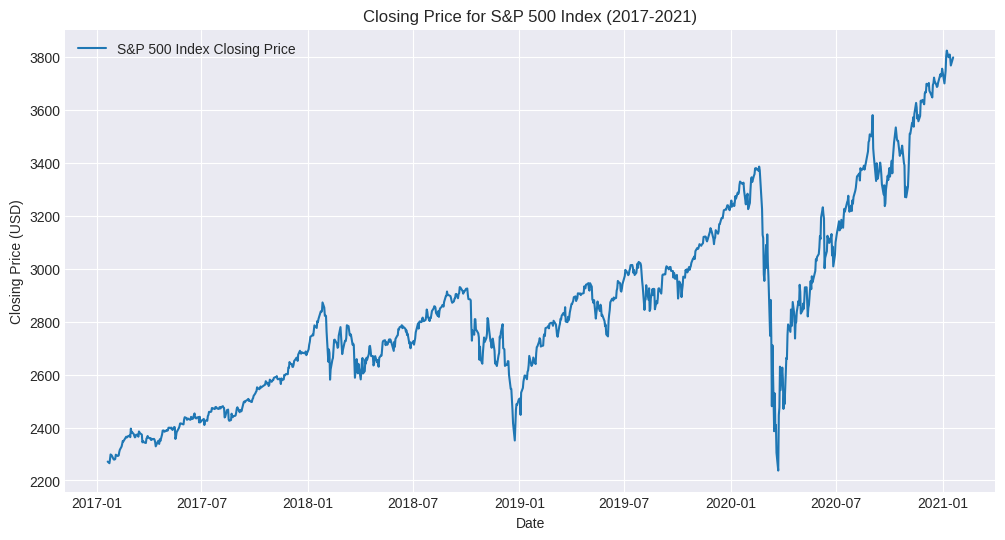

In [29]:
trump_ticker = '^GSPC'
trump_data = yf.Ticker(trump_ticker)
trump_df = trump_data.history(period='1d', start='2017-01-20', end='2021-01-20')

# S&P 500 Plot
plt.figure(figsize=(12, 6))
plt.plot(trump_df.index, trump_df['Close'], label='S&P 500 Index Closing Price')
plt.title('Closing Price for S&P 500 Index (2017-2021)')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

## Exploratory Analysis

Now that we have successfully imported the data we need, we resume by doing some exploratory analysis.

We thought that the context of the tweet would have the largest impact on the stock. Therefore, we add an extra variable: sentiment. By using the natural language tool kit, it can measure the positivity and negativity of the words from the tweet and normalizes the range between -1 and 1. We also train the analyzer with financial market related words by giving high values since they would have a higher correlation within the context of our project.

If a certain word is neutral or not included in the analyzer's lexicon it results a 0 in sentiment level.

In [30]:
sia = SentimentIntensityAnalyzer()

new_words = {
    'tesla': 4.0, 'S&P': 4.0, 'buy': 4.0, 'sell': -4.0, 'crash': -3.0,
    'bearish': -3.0, 'bullish': 3.0, 'profitable': 2.5, 'loss': -2.5, 
    'gain': 2.5, 'growth': 2.0, 'decline': -2.0, 'rally': 2.5, 'risk': -2.0
}

sia.lexicon.update(new_words)

musk['sentiment'] = musk['tweets'].apply(lambda x: sia.polarity_scores(x)['compound'])
trump['sentiment'] = trump['tweets'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [31]:
musk.head()

,tweets,retweets,likes,date,sentiment
0,thanks,209,7021,2022-10-27 16:17:39,0.4404
1,absolutely,755,26737,2022-10-27 13:19:25,0.0000
2,dear twitter advertisers,55927,356623,2022-10-27 13:08:00,0.3818
3,,802,19353,2022-10-27 02:32:48,0.0000
4,meeting a lot of cool people at twitter today,9366,195546,2022-10-26 21:39:32,0.3182


In [32]:
trump.head()

,tweets,retweets,likes,date,sentiment
0,Be sure to tune in and watch Donald Trump on L...,500,868,2009-05-04 20:54:25,0.4767
1,Donald Trump will be appearing on The View tom...,33,273,2009-05-05 03:00:10,0.7506
2,Donald Trump reads Top Ten Financial Tips on L...,12,18,2009-05-08 15:38:08,0.6115
3,New Blog Post Celebrity Apprentice Finale and ...,11,24,2009-05-08 22:40:15,0.0000
4,My persona will never be that of a wallflower ...,1399,1965,2009-05-12 16:07:28,0.0000


First, we explore by searching correlation with sentiment level and the change in stock prices. We would like to see if positive tweets result upwardly in stock prices. 

We will plot the sentiment level with the percentage change in stock price. But because the daily level is extremely noisy we smooth our data by applying a rolling average of 7 day window. We also expect that rolling would capture some delayed effect of the impact of the tweet.  

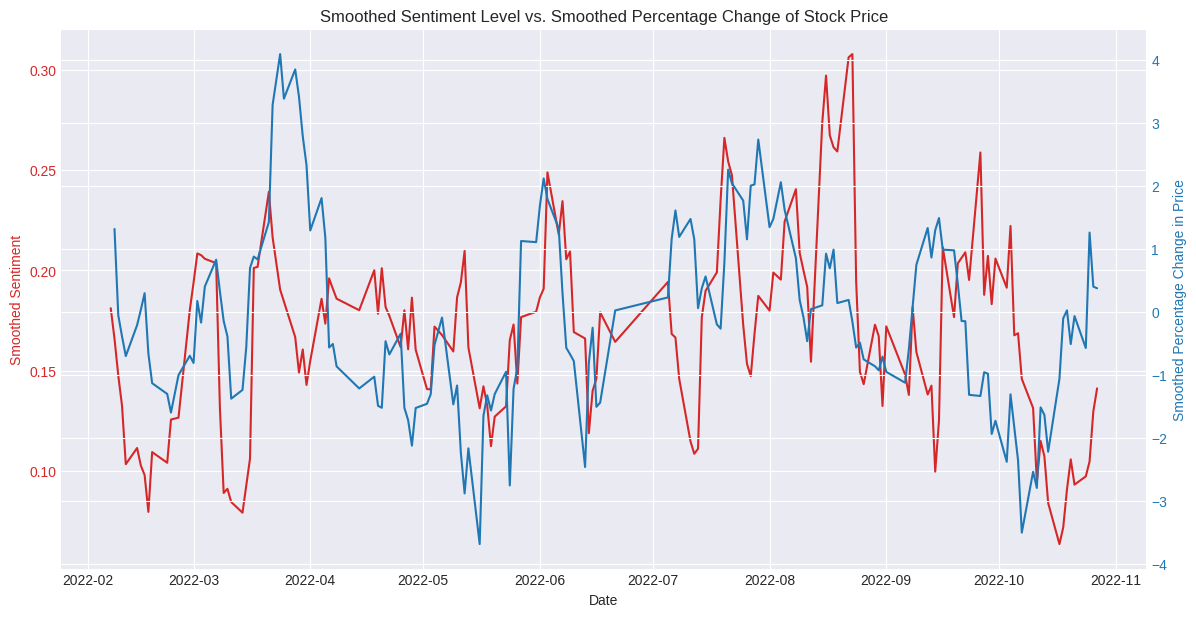

Correlation between smoothed sentiment and smoothed stock price: 0.22318472022731434


In [33]:
musk_ticker = 'TSLA' 

musk_data = yf.Ticker(musk_ticker)

musk_df = musk_data.history(period='1d', start=musk_oldest_date, end=musk_recent_date)

musk_df.reset_index(inplace=True)

musk_df['Date'] = musk_df['Date'].dt.tz_localize(None)

musk['date'] = musk['date'].dt.normalize()

# Since there are several tweets for a single day we compute the daily mean for the sentiment score. 
daily_average_sentiment = musk.groupby('date')['sentiment'].mean().reset_index()

combined_data = pd.merge(daily_average_sentiment, musk_df, left_on='date', right_on='Date', how='inner')

# Created a copy because it had the same variable name which changed the results in Random Forest Model
musk_combined = combined_data.copy()

musk_combined['pct_change_price'] = musk_combined['Close'].pct_change() * 100

# Apply a rolling average (e.g., over a 7-day window)
musk_combined['sentiment_smoothed'] = musk_combined['sentiment'].rolling(window=7).mean()
musk_combined['pct_change_smoothed'] = musk_combined['pct_change_price'].rolling(window=7).mean()

fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Smoothed Sentiment', color=color)
ax1.plot(musk_combined['Date'], musk_combined['sentiment_smoothed'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Smoothed Percentage Change in Price', color=color)
ax2.plot(musk_combined['Date'], musk_combined['pct_change_smoothed'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Smoothed Sentiment Level vs. Smoothed Percentage Change of Stock Price')
plt.show()

correlation_smoothed = musk_combined['sentiment_smoothed'].corr(musk_combined['pct_change_smoothed'])
print(f"Correlation between smoothed sentiment and smoothed stock price: {correlation_smoothed}")

In [34]:
trump_ticker = '^GSPC' 

trump_data = yf.Ticker(trump_ticker)

trump_df = trump_data.history(period='1d', start='2017-01-20', end='2021-01-20')

trump_df.reset_index(inplace=True)

trump_df['Date'] = trump_df['Date'].dt.tz_localize(None)

mask_trump = (trump['date'] >= '2017-01-20') & (trump['date'] <= '2021-01-20')
filtered_trump = trump.loc[mask_trump]
new_trump = filtered_trump.copy()
new_trump['date'] = new_trump['date'].dt.normalize()

The code above is used in future cells, hence we keep it alone. 

The code below is a shortened range version that matches the range of Musk's range which is one year. We have selected a single year from Trump's serving years. (2018)

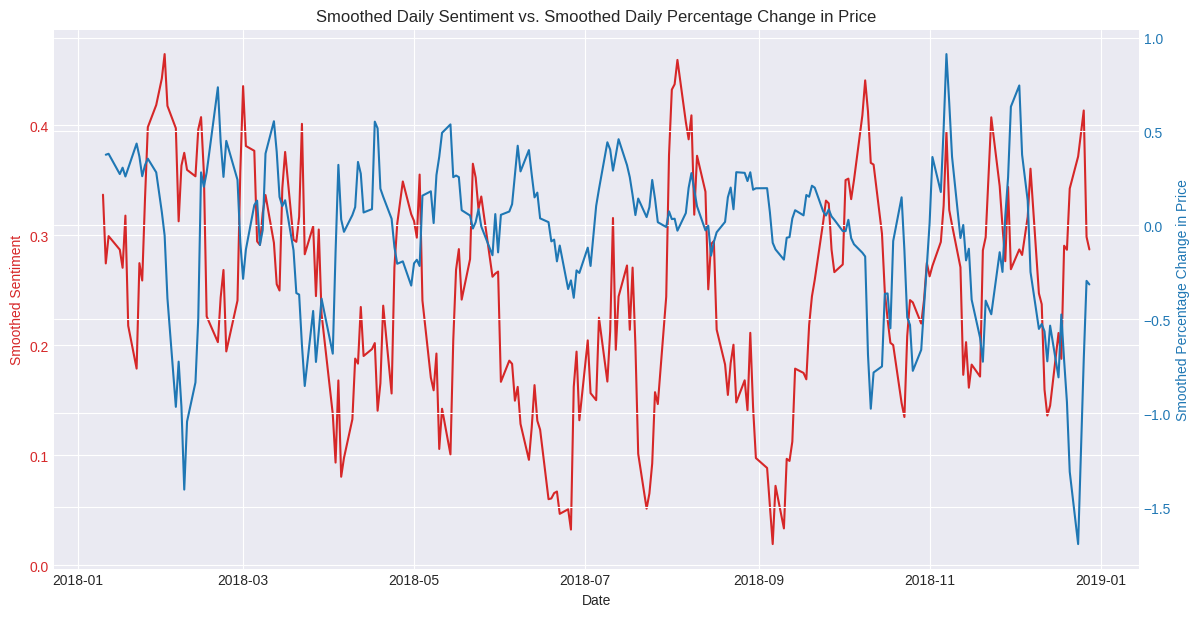

Correlation between smoothed daily sentiment and smoothed daily percentage change in price: -0.18287115402078152


In [35]:
trump_df_short = trump_data.history(period='1d', start='2018-01-01', end='2018-12-31')
trump_df_short.reset_index(inplace=True)
trump_df_short['Date'] = trump_df_short['Date'].dt.tz_localize(None)
mask_trump_short = (trump['date'] >= '2018-01-01') & (trump['date'] <= '2018-12-31')
filtered_trump_short = trump.loc[mask_trump_short]
new_trump_short = filtered_trump_short.copy()

new_trump_short['date'] = new_trump_short['date'].dt.normalize()

trump_daily_average_sentiment_short = new_trump_short.groupby('date')['sentiment'].mean().reset_index()

trump_combined_data_short = pd.merge(trump_daily_average_sentiment_short, trump_df, left_on='date', right_on='Date', how='inner')

# Created a copy because it had the same variable name which changed the results in Random Forest Model
trump_combined = trump_combined_data_short.copy()

trump_combined['pct_change_price'] = trump_combined['Close'].pct_change() * 100

# Apply a rolling average (e.g., over a 7-day window) to smooth the data
trump_combined['sentiment_smoothed'] = trump_combined['sentiment'].rolling(window=7).mean()
trump_combined['pct_change_smoothed'] = trump_combined['pct_change_price'].rolling(window=7).mean()

fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Smoothed Sentiment', color=color)
ax1.plot(trump_combined['Date'], trump_combined['sentiment_smoothed'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Smoothed Percentage Change in Price', color=color)
ax2.plot(trump_combined['Date'], trump_combined['pct_change_smoothed'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Smoothed Daily Sentiment vs. Smoothed Daily Percentage Change in Price')
plt.show()

correlation_smoothed = trump_combined['sentiment_smoothed'].corr(trump_combined['pct_change_smoothed'])
print(f"Correlation between smoothed daily sentiment and smoothed daily percentage change in price: {correlation_smoothed}")

#### Results

The correlation for sentiment level and percentage change in stock price for Tesla is 0.2231 indicating that is has a weak positive correlation.

On the other hand, S&P 500 has a weak negative correlation of -0.1828. 

It is quite interesting that the correlation is contrasting among the two people. 

To delve deeper, we will use variables (amount of tweets, sum of retweets, sum of likes, and sentiment) to plot linear regression graphs. 

In [36]:
#TRUMP
trump_daily_average_sentiment = new_trump.groupby('date')['sentiment'].mean().reset_index()

daily_sum_retweets = new_trump.groupby('date')['retweets'].sum().reset_index()
daily_sum_likes = new_trump.groupby('date')['likes'].sum().reset_index()
daily_amount_tweets = new_trump.groupby('date')['tweets'].count().reset_index()

daily_metrics = trump_daily_average_sentiment.merge(daily_sum_retweets, on='date').merge(daily_sum_likes, on='date').merge(daily_amount_tweets, on='date')

daily_metrics.rename(columns={'retweets': 'sum_retweets', 'likes': 'sum_likes', 'tweets' : 'count_tweets'}, inplace=True)

trump_combined_data = pd.merge(daily_metrics, trump_df, left_on='date', right_on='Date', how='inner')

trump_combined_data.drop('Date', axis=1, inplace=True)

trump_combined_data.head()

,date,sentiment,sum_retweets,sum_likes,count_tweets,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2017-01-20,0.222315,365074,1691506,13,2269.959961,2276.959961,2265.010010,2271.310059,3536850000,0.0,0.0
1,2017-01-23,0.493900,23078,160287,1,2267.780029,2271.780029,2257.020020,2265.199951,3155240000,0.0,0.0
2,2017-01-24,0.243825,74683,446020,4,2267.879883,2284.629883,2266.679932,2280.070068,3816950000,0.0,0.0
3,2017-01-25,0.137838,204627,991265,8,2288.879883,2299.550049,2288.879883,2298.370117,3849340000,0.0,0.0
4,2017-01-26,-0.021375,136428,699253,8,2298.629883,2300.989990,2294.080078,2296.679932,3611510000,0.0,0.0


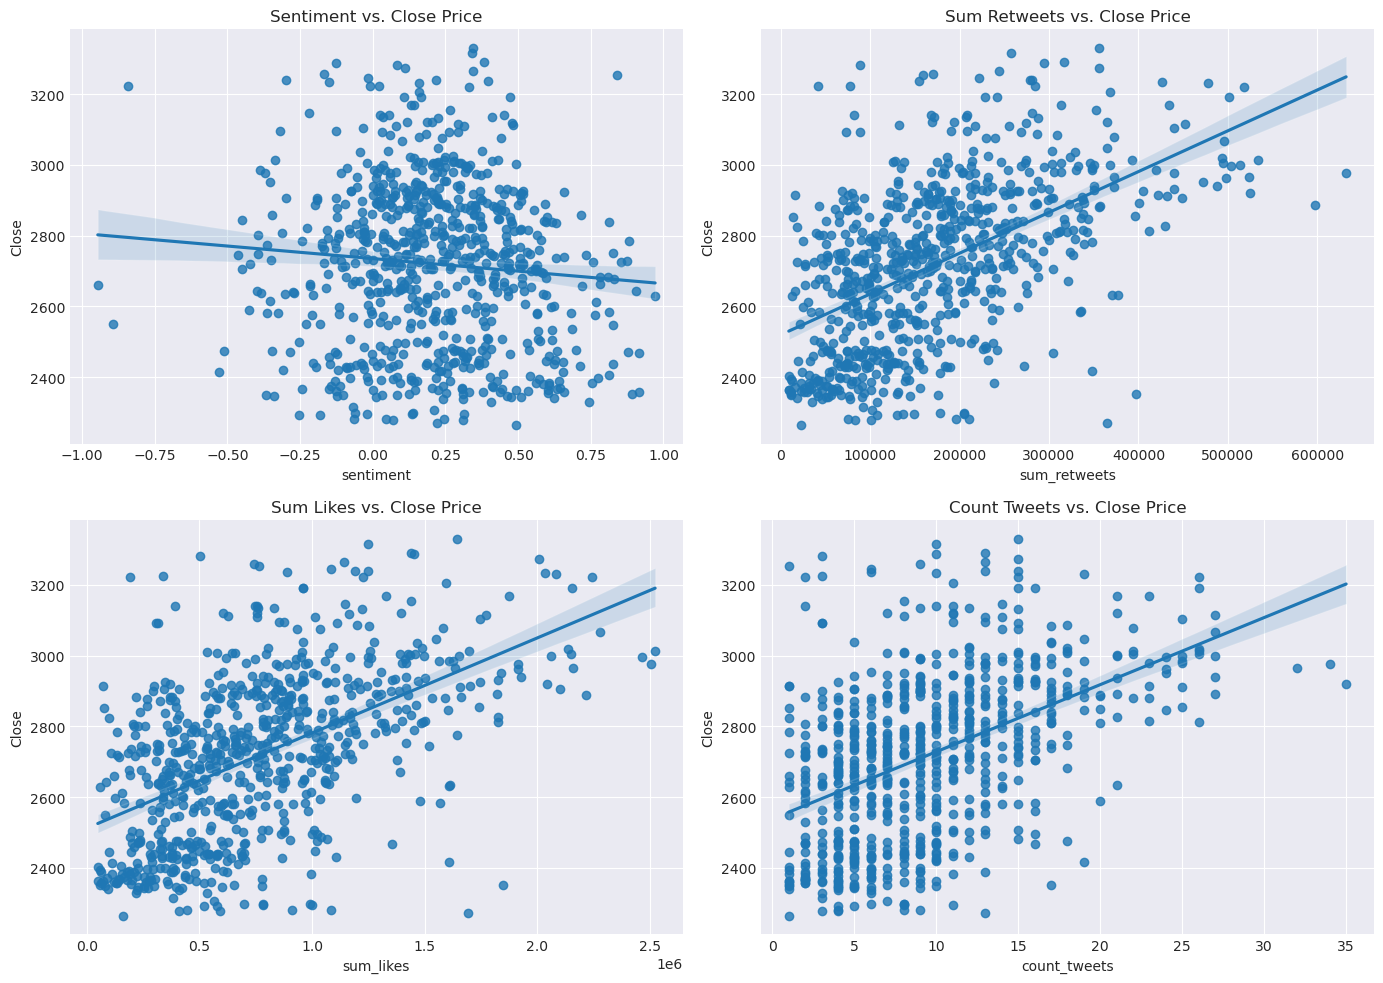

In [37]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
sns.set(style="whitegrid")

# Sentiment vs. Close Price
sns.regplot(x='sentiment', y='Close', data=trump_combined_data, ax=axs[0, 0])
axs[0, 0].set_title('Sentiment vs. Close Price')

# Sum Retweets vs. Close Price
sns.regplot(x='sum_retweets', y='Close', data=trump_combined_data, ax=axs[0, 1])
axs[0, 1].set_title('Sum Retweets vs. Close Price')

# Sum Likes vs. Close Price
sns.regplot(x='sum_likes', y='Close', data=trump_combined_data, ax=axs[1, 0])
axs[1, 0].set_title('Sum Likes vs. Close Price')

# Count Tweet vs. Close Price
sns.regplot(x='count_tweets', y='Close', data=trump_combined_data, ax=axs[1, 1])
axs[1, 1].set_title('Count Tweets vs. Close Price')

# Adjust the layout
plt.tight_layout()
plt.show()

In [38]:
#MUSK
musk_daily_average_sentiment = musk.groupby('date')['sentiment'].mean().reset_index()

musk_daily_sum_retweets = musk.groupby('date')['retweets'].sum().reset_index()
musk_daily_sum_likes = musk.groupby('date')['likes'].sum().reset_index()
musk_daily_amount_tweets = musk.groupby('date')['tweets'].count().reset_index()

musk_daily_metrics = musk_daily_average_sentiment.merge(musk_daily_sum_retweets, on='date').merge(musk_daily_sum_likes, on='date').merge(musk_daily_amount_tweets, on='date')

musk_daily_metrics.rename(columns={'retweets': 'sum_retweets', 'likes': 'sum_likes', 'tweets' : 'count_tweets'}, inplace=True)

musk_combined_data = pd.merge(musk_daily_metrics, musk_df, left_on='date', right_on='Date', how='inner')

musk_combined_data.drop('Date', axis=1, inplace=True)

musk_combined_data.head()

,date,sentiment,sum_retweets,sum_likes,count_tweets,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2022-01-28,0.338110,14290,216175,10,277.186676,285.833344,264.003326,282.116669,134789100,0.0,0.0
1,2022-01-31,0.093438,57510,515787,8,290.903320,312.663330,287.350006,312.239990,104436000,0.0,0.0
2,2022-02-01,0.254744,3731,70542,9,311.736664,314.566681,301.666656,310.416656,73138200,0.0,0.0
3,2022-02-02,0.306282,16675,299792,11,309.393341,310.500000,296.470001,301.886658,66792900,0.0,0.0
4,2022-02-03,0.157183,18641,213255,12,294.000000,312.333344,293.506653,297.046661,78855600,0.0,0.0


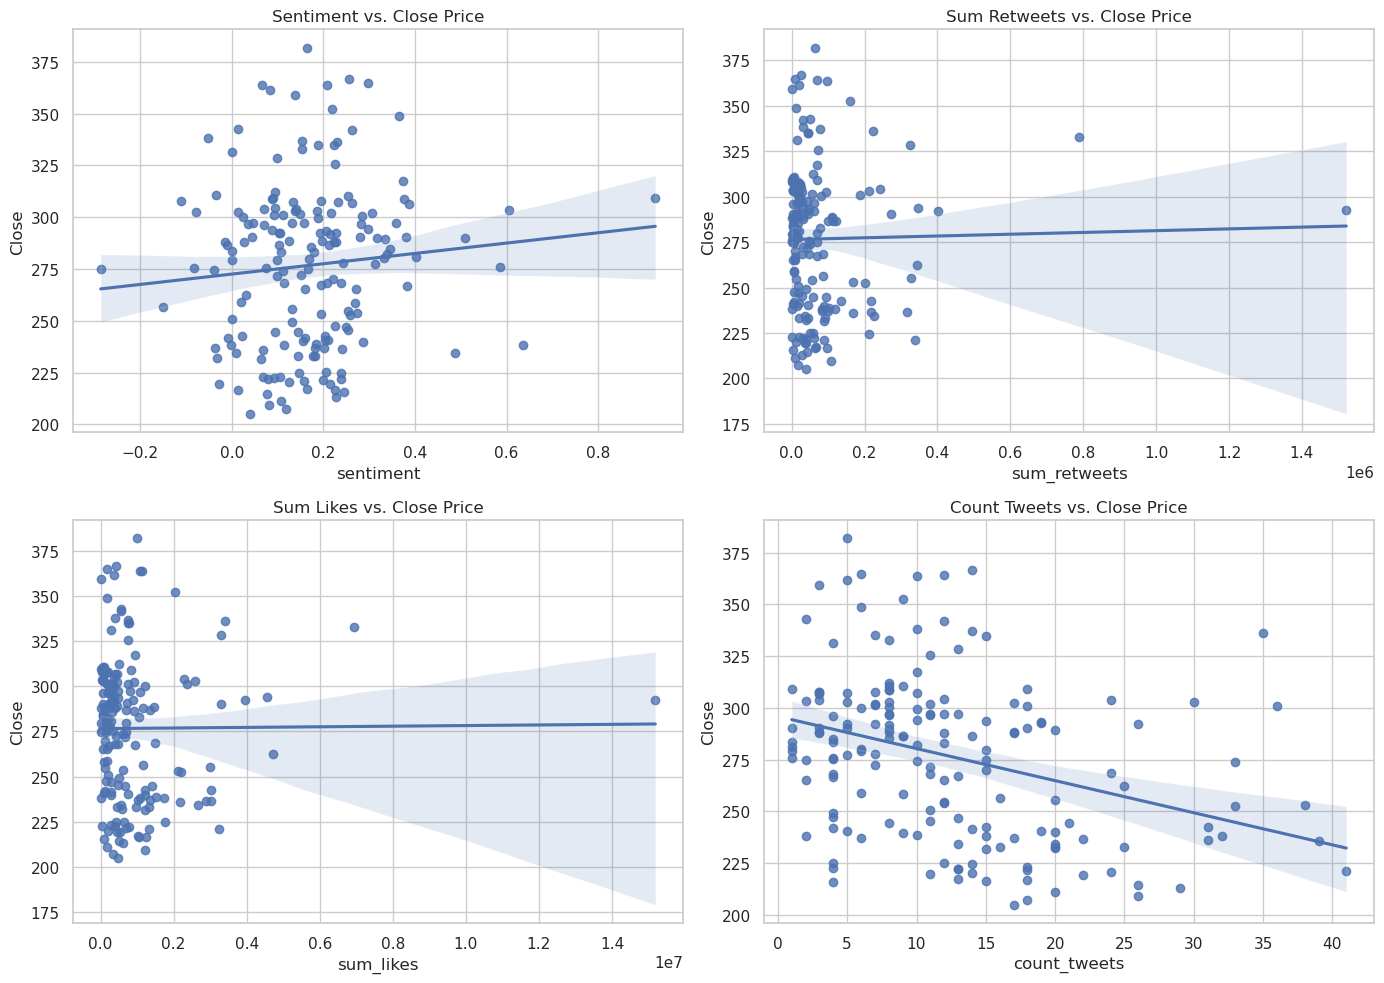

In [39]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
sns.set(style="whitegrid")

# Sentiment vs. Close Price
sns.regplot(x='sentiment', y='Close', data=musk_combined_data, ax=axs[0, 0])
axs[0, 0].set_title('Sentiment vs. Close Price')

# Sum Retweets vs. Close Price
sns.regplot(x='sum_retweets', y='Close', data=musk_combined_data, ax=axs[0, 1])
axs[0, 1].set_title('Sum Retweets vs. Close Price')

# Sum Likes vs. Close Price
sns.regplot(x='sum_likes', y='Close', data=musk_combined_data, ax=axs[1, 0])
axs[1, 0].set_title('Sum Likes vs. Close Price')

# Count Tweet vs. Close Price
sns.regplot(x='count_tweets', y='Close', data=musk_combined_data, ax=axs[1, 1])
axs[1, 1].set_title('Count Tweets vs. Close Price')

# Adjust the layout
plt.tight_layout()
plt.show()

#### Results

By looking at these four variables ("amount of tweets", "sum of retweets", "sum of likes" and "sentiment"), From these linear  regression graphs, We can check the linear relationship between these variables and changes in stock prices.

With Trump's linear regression graphs, we can see that "sum of retweets", "sum of likes", "sentiment" may be good predictors of the model. They have a strong positive correlation with the change in stock price for  S&P 500. In the next step of the model construction process, we will focus on considering these variables.

Using Musk's linear regression graphs, we can see that "sentiment", "amount of tweets" may be good predictors of the model. The "amount of tweets" have a strong negative correlation with the change in stock price for Tesla, and all other variables have a weak positive correlation with  Tesla stock price. They may have an effect on the stock price, but not much.


## **Random Forest Model**
We would like to use a predictive model to understand the impact that of  social media posts from high profile people on stock market performance.
Studying the impact of tweets from influential figures like Elon Musk and Donald Trump on stock prices is increasingly important for several reasons, reflecting the intersection of social media, public perception, and financial markets. Understanding this dynamic is crucial for market participants who need to gauge the potential impact of social media on financial markets. Furthermore, traders and investors can refine their strategies by understanding how and to what extent social media influences stock prices.

To do this, we opt for the Random Forest Model due to some factors. Firstly, Random Forest is a powerful machine learning algorithm that handlies complex datasets with intricate relationships between features. Stock prices and their movements are influenced by a myriad of factors, including market sentiment, investor perceptions, and external events, often in non-linear ways. Random Forest can capture these complex, non-linear interactions between tweet characteristics (like sentiment, engagement metrics) and stock price movements without the need for extensive feature engineering or transformation. The model also reduces the risk for over-fitting, on top of providing straightforward metrics for evaluating the importance of each feature in making predictions.

At this point in time, we opt to build one model that aggregates the two high-profile individuals and their potential influence on stock prices. A single model can provide insights into the general impact of high-profile tweets on stock prices, applicable beyond just the two individuals.

Cleaning Steps:
1. Calculating average daily sentiment, sum of retweets and sum of likes per day for both individuals.
2. Normalizing the numerical variables 'sentiment', 'sum_retweets', 'sum_likes', 'Perc_Change' using MinMaxScaler() to improve performance and training stability of the model.
3. Binary enconding the variable 'source; that takes value of 'Elon Musk' and 'Donald Trump'
4. Calculating percentage change on daily closing stock prices.
5. Combining both sets.

In [40]:
#TRUMP
#daily_average_sentiment = musk.groupby('date')['sentiment'].mean().reset_index()
trump_daily_average_sentiment = new_trump.groupby('date')['sentiment'].mean().reset_index()

# Calculate the daily sum for retweets and likes
daily_sum_retweets = new_trump.groupby('date')['retweets'].sum().reset_index()
daily_sum_likes = new_trump.groupby('date')['likes'].sum().reset_index()

# Merge the daily metrics into a single DataFrame
daily_metrics = trump_daily_average_sentiment.merge(daily_sum_retweets, on='date').merge(daily_sum_likes, on='date')

# Renaming the columns to reflect that retweets and likes are sums
daily_metrics.rename(columns={'retweets': 'sum_retweets', 'likes': 'sum_likes'}, inplace=True)

trump_combined_data = pd.merge(daily_metrics, trump_df, left_on='date', right_on='Date', how='inner')

# Optionally, drop the extra 'Date' column from the stock price dataset if it's redundant
trump_combined_data.drop('Date', axis=1, inplace=True)

# Getting target outcome: pct change
trump_combined_data['Perc_Change'] = trump_combined_data['Close'].pct_change() * 100


columns_to_normalize = ['sentiment', 'sum_retweets', 'sum_likes', 'Perc_Change']

# Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Replace NaN values in the DataFrame with the mean of their respective columns before normalization
# This step is important because scaling does not work with NaN values
for column in columns_to_normalize:
    trump_combined_data[column] = trump_combined_data[column].fillna(trump_combined_data[column].mean())

    
# Fit and transform the selected columns with the scaler
trump_combined_data[columns_to_normalize] = scaler.fit_transform(trump_combined_data[columns_to_normalize])

In [41]:
#MUSK
musk_daily_average_sentiment = musk.groupby('date')['sentiment'].mean().reset_index()

# Calculate the daily sum for retweets and likes
musk_daily_sum_retweets = musk.groupby('date')['retweets'].sum().reset_index()
musk_daily_sum_likes = musk.groupby('date')['likes'].sum().reset_index()

# Merge the daily metrics into a single DataFrame
musk_daily_metrics = musk_daily_average_sentiment.merge(musk_daily_sum_retweets, on='date').merge(musk_daily_sum_likes, on='date')

# Renaming the columns to reflect that retweets and likes are sums
musk_daily_metrics.rename(columns={'retweets': 'sum_retweets', 'likes': 'sum_likes'}, inplace=True)

musk_combined_data = pd.merge(musk_daily_metrics, musk_df, left_on='date', right_on='Date', how='inner')

# Drop the extra 'Date' column from the stock price dataset if it's redundant
musk_combined_data.drop('Date', axis=1, inplace=True)

# Getting target outcome: pct change
musk_combined_data['Perc_Change'] = musk_combined_data['Close'].pct_change() * 100

#Storing DF Without normalization
musk_data_total2 = musk_combined_data

columns_to_normalize = ['sentiment', 'sum_retweets', 'sum_likes', 'Perc_Change']

# Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Replace NaN values in the DataFrame with the mean of their respective columns before normalization
# This step is important because scaling does not work with NaN values
for column in columns_to_normalize:
    musk_combined_data[column] = musk_combined_data[column].fillna(musk_combined_data[column].mean())

# Fit and transform the selected columns with the scaler
musk_combined_data[columns_to_normalize] = scaler.fit_transform(musk_combined_data[columns_to_normalize])

Modelling steps:

- Defining X variables: sentiment, sum_retweets, sum_likes, source
- Defining Y (outcome) variable: percentage price change
- Splitting into train and test
- Cross Validating and model building in train set
- Predicting in the test set

In [42]:
#Joining the 2 datasets

musk_combined_data['source'] = 'Elon Musk'
trump_combined_data['source'] = 'Donald Trump'
combined_data = pd.concat([musk_combined_data, trump_combined_data], ignore_index=True)
combined_data['source'] = combined_data['source'].replace({'Elon Musk': 1, 'Donald Trump': 0})

Initiating the Random Forest Model

In [43]:
#Random Forest model initiation
X = combined_data[['sentiment', 'sum_retweets', 'sum_likes', 'source']]
y = combined_data['Perc_Change']

#Getting X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

#Building model 
#Note that this is a first attempt that still needs tunning. We plan to proceed with hypterparameter tuning.
model = RandomForestRegressor(n_estimators=100, random_state=42)

#Cross validating
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

# Convert scores to positive 
scores = -scores

# Results
print("MAE scores for each fold:", scores)
print("Average MAE:", scores.mean())
print("Standard Deviation of MAE:", scores.std())

#Training 
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print("MAE on the test set:", mae)

importances = model.feature_importances_
# Map these importances to the corresponding feature names and sort them
feature_importances = sorted(zip(importances, X.columns), reverse=True)
#print("Feature importances:", feature_importances)

MAE scores for each fold: [0.16320393 0.06422658 0.05750234 0.07346849 0.09145134]
Average MAE: 0.0899705351146062
Standard Deviation of MAE: 0.038352510334268716
MAE on the test set: 0.07538972544889276


**Hyperparameter tuning**
- Hyperparameter tuning is a crucial part of the machine learning workflow, primarily aimed at optimizing the model to improve its accuracy, efficiency, or prevent overfitting.
- Hyperparameter tuning involves selecting a combination of hyperparameters that yields the best performance from a model.

**Benefits**:
- Improving Model Accuracy: By tuning hyperparameters, you can often significantly improve the performance of a model on new, unseen data.
- Preventing Overfitting: Proper hyperparameter settings can help in controlling overfitting, which is crucial for the model’s ability to generalize.
- Efficiency: Finding the right hyperparameters can make the training process more computationally efficient, speeding up training or requiring less data to train effectively.

GridSearchCV is one method used for hyperparameter tuning. It exhaustively searches through a manually specified subset of the hyperparameter space defined in a param_grid

**Tuning Parameters**:
- n_estimators: This parameter specifies the number of trees in the forest. Generally, a higher number of trees increases the model's performance and makes the predictions more stable, but it also makes your model slower and computationally more expensive.
- max_depth: This parameter controls the maximum depth of each tree. Deeper trees can model more complex patterns by creating more splits and capturing more information about the data. However, setting it too high can lead to overfitting, where the model learns the training data too well, including the noise and fluctuations in the data, which will not generalize well on new data.

In [44]:
# Initialize the model
model = RandomForestRegressor(random_state=42)

#Setting up param_grid
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250, 300],  # Number of trees in the forest
    'max_depth': [1, 3, 5, 10, 15, 20]  # Maximum number of levels in each tree
}

# Setup the GridSearchCV with the param_grid
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=2, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Retrieve the mean test scores
mean_scores = grid_search.cv_results_['mean_test_score']

# Creating a DataFrame for better visualization and analysis
results_df = pd.DataFrame(grid_search.cv_results_['params'])
results_df['mean_test_score'] = mean_scores

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END .......................max_depth=1, n_estimators=50; total time=   0.1s
[CV] END .......................max_depth=1, n_estimators=50; total time=   0.1s
[CV] END .......................max_depth=1, n_estimators=50; total time=   0.1s
[CV] END .......................max_depth=1, n_estimators=50; total time=   0.1s
[CV] END .......................max_depth=1, n_estimators=50; total time=   0.1s
[CV] END ......................max_depth=1, n_estimators=100; total time=   0.2s
[CV] END ......................max_depth=1, n_estimators=100; total time=   0.3s
[CV] END ......................max_depth=1, n_estimators=100; total time=   0.2s
[CV] END ......................max_depth=1, n_estimators=100; total time=   0.2s
[CV] END ......................max_depth=1, n_estimators=100; total time=   0.2s
[CV] END ......................max_depth=1, n_estimators=150; total time=   0.3s
[CV] END ......................max_depth=1, n_e

After performing hyperparameter tuning, it is crucial to understand how they relate to model fitting and overal test scores. To do so, we are creating two plots that demonstrate the mean cv test scores for the two hyperparameters we are tuning. Thus, the first plot relates to 'Performance vs. Number of Estimators', and the second plot relates to 'Performance vs. Max Depth'. Even though we could directly extract the hyperparameters without visualizing them, creating a visualization helps understand how changing the parameters impact model performance overall.

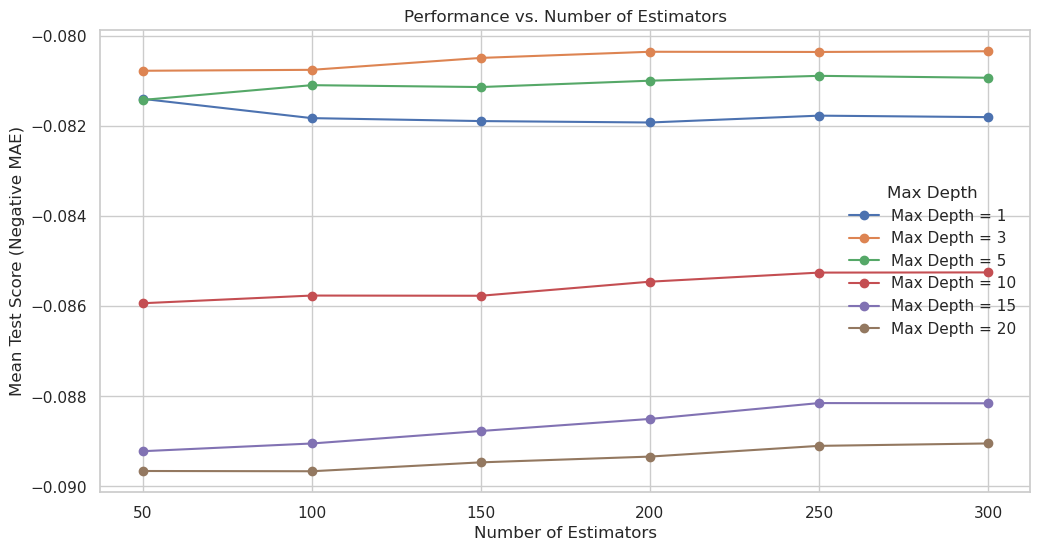

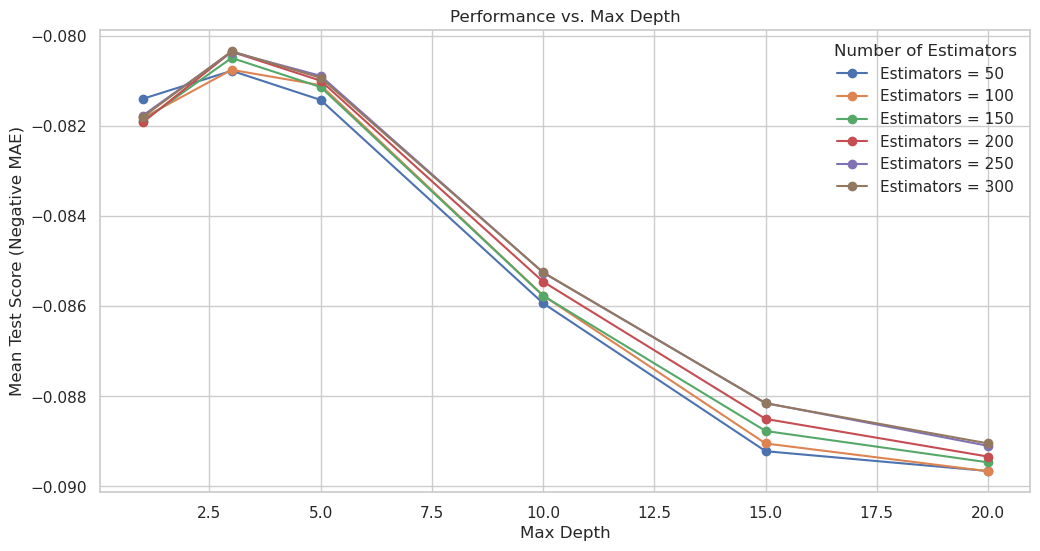

In [45]:
mean_scores = grid_search.cv_results_['mean_test_score']
param_list = grid_search.cv_results_['params']

# Creating a DataFrame for better visualization and analysis
results_df = pd.DataFrame(param_list)
results_df['mean_test_score'] = mean_scores

# Plotting for n_estimators
plt.figure(figsize=(12, 6))
for depth in sorted(results_df['max_depth'].unique()):
    subset = results_df[results_df['max_depth'] == depth]
    plt.plot(subset['n_estimators'], subset['mean_test_score'], marker='o', linestyle='-', label=f'Max Depth = {depth}')

plt.title('Performance vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score (Negative MAE)')
plt.legend(title='Max Depth')
plt.grid(True)
plt.show()

# Plotting for max_depth
plt.figure(figsize=(12, 6))
for n_est in sorted(results_df['n_estimators'].unique()):
    subset = results_df[results_df['n_estimators'] == n_est]
    plt.plot(subset['max_depth'], subset['mean_test_score'], marker='o', linestyle='-', label=f'Estimators = {n_est}')

plt.title('Performance vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Mean Test Score (Negative MAE)')
plt.legend(title='Number of Estimators')
plt.grid(True)
plt.show()

**Interpretation**: 
- 'Performance vs. Number of Estimators': this plot clearly demonstrates a superiority of the 'max depth = 3' parameter. It also indicates that the best performance is achieved around 200 and 300 'number of estimators', however the model shows low sensitivity to the number of estimators.
- 'Performance vs. Max Depth': This graph demonstrates once again that the best performance is achieved when max depth = 3. It also confirms the idea that the number of estimators do not strongly affect the models' performance.

**Best Hyperparameters**:
- The {'max_depth': 3, 'n_estimators': 300} configuration indicates the best settings found for your RandomForest model.
- max_depth of 3: This relatively shallow depth prevents the model from becoming overly complex and overfitting the data, which is particularly important given your model’s context and data characteristics. A depth of 3 suggests that each decision tree in the forest makes only three splits before reaching a prediction.
- n_estimators of 300: This indicates that your model uses 300 trees to make a prediction. A higher number of trees can improve prediction accuracy and model stability because it averages more decision paths, at the cost of increased computational resources and time.

**Following Steps**:
- Following hyperparemeter tunining, it is now important to re-run the model with the best hyperparameter. 

In [46]:
feature_names = X_train.columns

# Use the best estimator found by the grid search
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate the Mean Absolute Error on the test set
mae_test = mean_absolute_error(y_test, y_pred)

# Extract feature importances
importances = best_model.feature_importances_

# Sort features by importance
indices = np.argsort(importances)[::-1]

# Print the feature rankings
print("Feature ranking:")

# Optionally, create a DataFrame for better visualization
feature_importances_df = pd.DataFrame({
    'Feature': feature_names[indices],
    'Importance': importances[indices]
})

# Display the DataFrame sorted by importance
print(feature_importances_df)

# Print the results
print("Best model parameters:", grid_search.best_params_)
print("Mean Absolute Error on the test set:", mae_test)

Feature ranking:
        Feature  Importance
0  sum_retweets    0.335099
1        source    0.284750
2     sentiment    0.257632
3     sum_likes    0.122520
Best model parameters: {'max_depth': 3, 'n_estimators': 300}
Mean Absolute Error on the test set: 0.06755777619365051


**Interpretation of results:**

The feature ranking indicates how influential each feature is in predicting the target variable. In our RandomForest model, the importance of each feature is quantified as follows:

**sum_retweets:** This is the most influential feature, with an importance score of approximately 0.335. It implies that the number of retweets a post has received is the most predictive of the changes in stock price.

**source:** The second most important feature, with a score of around 0.285. This suggests that the source of the post (whether it comes from Elon Musk or Donald Trump) significantly affects the outcome.

**sentiment:** The third in importance with a score of about 0.258. This feature likely represents an analysis of the mood or tone of the post's content, indicating its substantial role in the model's predictions.

**sum_likes:** The least influential of the listed features but still relevant, with an importance of about 0.123. This shows that while likes are predictive, they are less so compared to the number of retweets or the source of the post.

The MAE value of 0.06755777619365051 is a metric that represents the average magnitude of errors in our predictions, without considering their direction (i.e., whether they are over or underestimations). A lower MAE value indicates better model performance, with 0 being a perfect score. The value achieved suggests that your model predictions are quite close to the actual values, indicating good model performance.

Overall, these results imply that our model is well-tuned and effective at making predictions based on the given data, with a particular emphasis on how engagement metrics like retweets and the contextual factors like source and sentiment play a crucial role in the difference in stock prices.

**Conclusion:**
- 

Our project has unearthed significant insights into the interplay between social media influence and financial market dynamics. We have demonstrated that tweets from high-profile individuals, characterized by their number of retweets, source, and sentiment, have a measurable impact on stock prices. Our analysis, using a RandomForest model, revealed that retweets stand as the most predictive of stock price fluctuations, followed by the identity of the tweet's source and the sentiment expressed within these tweets.

After understanding how the different variables impact stock prices, we can try to better visualize the impact of one's tweets on stock prices. To do this, we create two graphs: 1. one indicating Elon Musk's most afluential tweets (weighted by the weights indicated through the Random Forest model) and how stock prices changed in days prior to the tweet and afterr the tweet, and 2. one indicating Donald Trump's most afluential tweets.

We do this in order to visualize the results of our model and also understand how it performs for the 2 individuals on the dataset. 

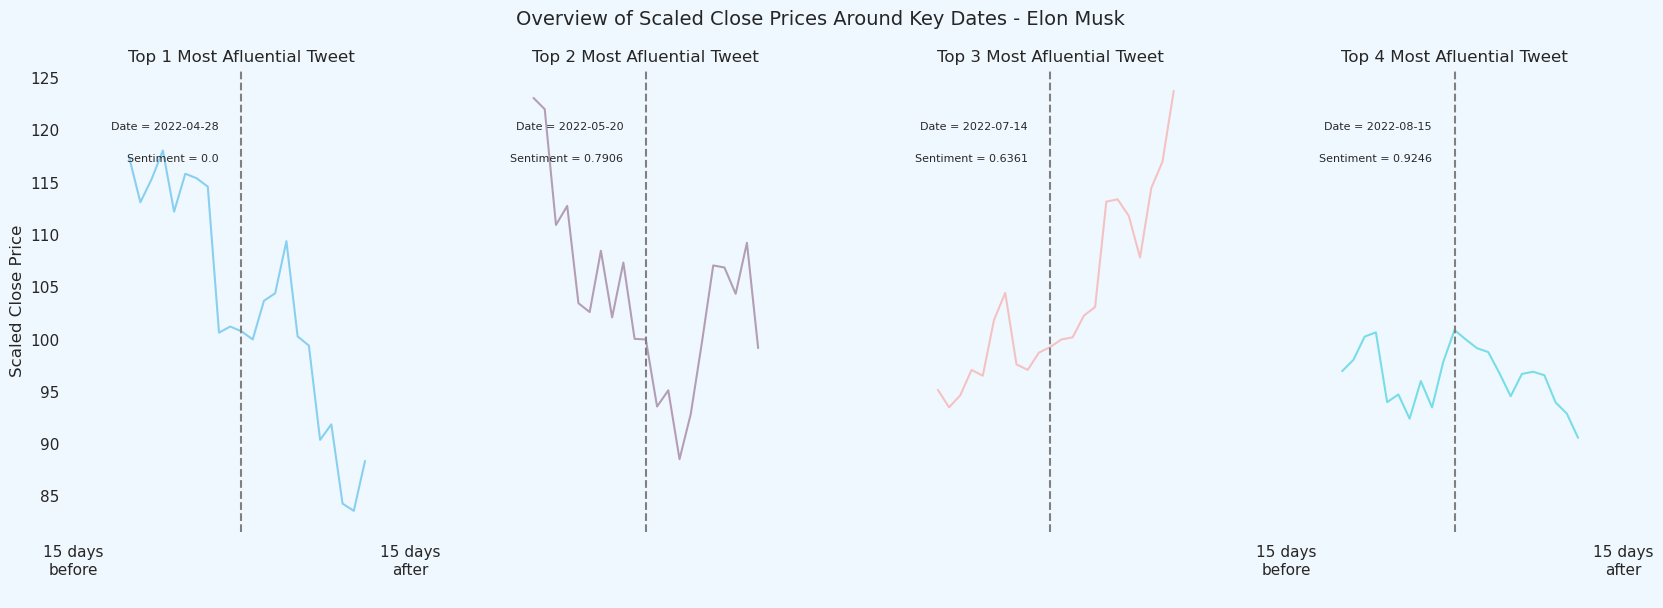

In [47]:
#Musk
musk_daily_metrics.rename(columns={'retweets': 'sum_retweets', 'likes': 'sum_likes'}, inplace=True)
musk_combined_data2 = pd.merge(musk_daily_metrics, musk_df, left_on='date', right_on='Date', how='inner')
musk_combined_data2.drop('Date', axis=1, inplace=True)

# Normalize features using max value for each
scaler = MinMaxScaler()
musk_combined_data2[['norm_retweets', 'norm_likes', 'norm_sentiment']] = scaler.fit_transform(
    musk_combined_data2[['sum_retweets', 'sum_likes', 'sentiment']]
)


total_weight = 0.335 + 0.123 + 0.258

# Calculate the influence score based on given importance weights
musk_combined_data2['influence_score'] = (
    0.335 * musk_combined_data2['norm_retweets']/ total_weight +
    0.123 * musk_combined_data2['norm_likes']/ total_weight +
    0.258 * musk_combined_data2['norm_sentiment']/ total_weight
)

musk[['norm_retweets', 'norm_likes', 'norm_sentiment']] = scaler.fit_transform(
    musk[['retweets', 'likes', 'sentiment']]
)

# Calculate the influence score based on given importance weights
musk['influence_score'] = (
    0.335 * musk['norm_retweets']/ total_weight +
    0.123 * musk['norm_likes']/ total_weight +
    0.258 * musk['norm_sentiment']/ total_weight
)

# Select the top N most influential tweets
top_tweets = musk_combined_data2.sort_values(by='influence_score', ascending=False).head(7)
top_dates = top_tweets['date'].unique() 
filtered_tweets = musk[musk['date'].isin(top_dates)]
tweets_musk = filtered_tweets.loc[filtered_tweets.groupby('date')['influence_score'].idxmax()].tail(4)
top_dates = tweets_musk['date']
musk_df = musk_df[['Date', 'Close']]
musk_df['Date'] = pd.to_datetime(musk_df['Date'])

stock_data_around_top_dates = []

for top_date in top_dates:
    # Define the date range
    date_range_start = top_date - pd.Timedelta(days=15)
    date_range_end = top_date + pd.Timedelta(days=15)
    
    # Create a mask to filter rows within the date range
    date_mask = (musk_df['Date'] >= date_range_start) & (musk_df['Date'] <= date_range_end)
    
    # Append the filtered DataFrame to the list
    stock_data_around_top_dates.append(musk_df.loc[date_mask])

# Now 'stock_data_around_top_dates' contains the stock data around each of the top 4 dates

def scale_by_middle(df):
    N = df.shape[0]
    middle_row_value = df.iloc[N // 2]["Close"]
    
    out = (df["Close"] / middle_row_value) * 100
    
    # Adjust the range calculation for even number of rows
    if N % 2 == 0:  # Check if even
        out.index = list(range(-(N//2) + 1, (N//2) + 1))  # Adjust for even length
    else:
        out.index = list(range(-(N//2), (N//2) + 1))
    
    out.name = "DeltaDays"
    return out
    
# Assuming 'stock_data_around_top_dates' is a list of DataFrames where each DataFrame
# corresponds to stock data around a top sentiment date
scaled_data_around_top_dates = [scale_by_middle(df) for df in stock_data_around_top_dates]


fig, axs = plt.subplots(1, 4, figsize=(20, 6), sharex=True, sharey=True)
subplot_background_color = '#F0F8FF'  
fig.set_facecolor(subplot_background_color)
line_colors = ['#89CFF0', '#B39EB5', '#F4C2C2', '#77DDE7']  
for ax in axs:
    ax.grid(False) 


# Loop over each Series and plot in a separate subplot
for i, ax in enumerate(axs.flat):
    # Plotting each series
    ax.plot(scaled_data_around_top_dates[i].index, scaled_data_around_top_dates[i].values, color=line_colors[i],  label=f"Top Date {i+1} Series")
    ax.axvline(x=0, color='gray', linestyle='--', label='Middle Date')

    ax.set_xlabel(" ")
    ax.set_title(f"Top {i+1} Most Afluential Tweet")

    #i[i].set_title(f"Top Date {i+1}")
    # Set background color for the subplot interior
    ax.set_facecolor(subplot_background_color)

# Remove border around each subplot
    for direction in ["top", "right", "left", "bottom"]:
        ax.spines[direction].set_visible(False)

    # Set y-axis label for the first subplot
    if i == 0:
        ax.set_ylabel("Scaled Close Price")
    else:
        ax.tick_params(labelleft=False) 

    # turn of tick marks
    ax.tick_params(which="both", left=False, labelbottom=False, right=False)
    ax.set_xticks([-15, 15]) 


# Set a common x-axis label
fig.suptitle('Overview of Scaled Close Prices Around Key Dates - Elon Musk ', fontsize=14)

for ax in axs[[0, 3]]:
    ax.tick_params(labelbottom=True)
    ax.set_xticklabels(["15 days\nbefore", "15 days\nafter"])
    
    for label in ax.xaxis.get_ticklabels():
        label.set_horizontalalignment("center")
        
df = tweets_musk[['tweets', 'date', 'sentiment']].reset_index(drop=True)
sentiments = list(df['sentiment'])
dates = list(df['date'])
dates= [ts.date() for ts in dates]

for i in range(len(axs)):
    axs[i].annotate(
        f'Sentiment = {sentiments[i]}',
        xy=(0.1, 117), xycoords="data", xytext=(-2, 117),
        annotation_clip=False,
        horizontalalignment="right",
        fontsize=8,
    )

for i in range(len(axs)):
    axs[i].annotate(
        f'Date = {dates[i]}',
        xy=(0.1, 120), xycoords="data", xytext=(-2, 120),
        annotation_clip=False,
        horizontalalignment="right", fontsize=8
    )

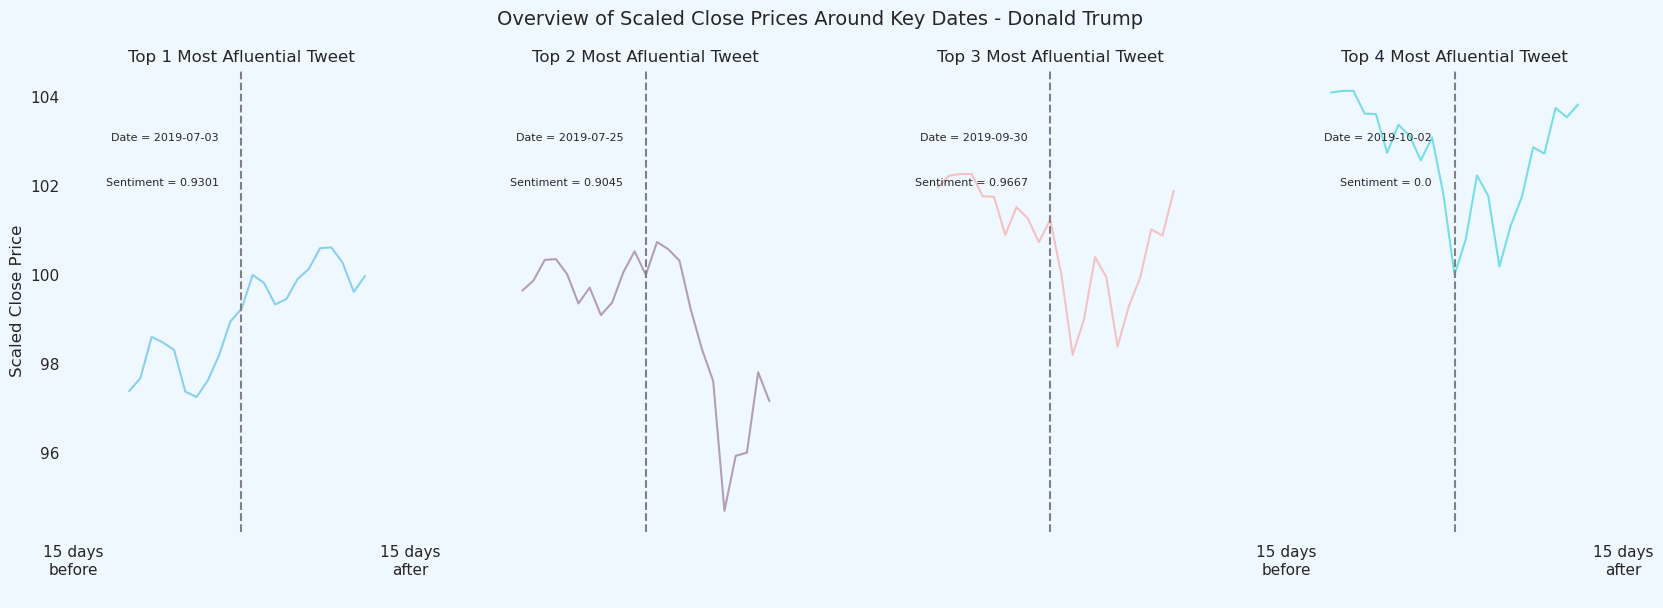

In [48]:
daily_metrics = trump_daily_average_sentiment.merge(daily_sum_retweets, on='date').merge(daily_sum_likes, on='date')
daily_metrics.rename(columns={'retweets': 'sum_retweets', 'likes': 'sum_likes'}, inplace=True)
trump_combined_data2 = pd.merge(daily_metrics, trump_df, left_on='date', right_on='Date', how='inner')
trump_combined_data2.drop('Date', axis=1, inplace=True)

#Creating influence score
from sklearn.preprocessing import StandardScaler

# Normalize features using max value for each
scaler = MinMaxScaler()
trump_combined_data2[['norm_retweets', 'norm_likes', 'norm_sentiment']] = scaler.fit_transform(
    trump_combined_data2[['sum_retweets', 'sum_likes', 'sentiment']]
)

total_weight = 0.335 + 0.123 + 0.258

# Calculate the influence score based on given importance weights
trump_combined_data2['influence_score'] = (
    0.335 * trump_combined_data2['norm_retweets']/ total_weight +
    0.123 * trump_combined_data2['norm_likes']/ total_weight +
    0.258 * trump_combined_data2['norm_sentiment']/ total_weight
)

trump[['norm_retweets', 'norm_likes', 'norm_sentiment']] = scaler.fit_transform(
    trump[['retweets', 'likes', 'sentiment']]
)

# Calculate the influence score based on given importance weights
trump['influence_score'] = (
    0.335 * trump['norm_retweets']/ total_weight +
    0.123 * trump['norm_likes']/ total_weight +
    0.258 * trump['norm_sentiment']/ total_weight
)

# Select the top N most influential tweets
trump_df['Date'] = trump_df['Date'].dt.tz_localize(None)
trump['date'] = trump['date'].dt.normalize()


top_tweets_trump = trump_combined_data2.sort_values(by='influence_score', ascending=False).head(7)
top_dates_trump = top_tweets_trump['date'].unique() 
filtered_tweets_trump = trump[trump['date'].isin(top_dates_trump)]
tweets_trump = filtered_tweets_trump.loc[filtered_tweets_trump.groupby('date')['influence_score'].idxmax()].head(4)
top_dates_trump = tweets_trump['date']

trump_df = trump_df[['Date', 'Close']]
trump_df['Date'] = pd.to_datetime(trump_df['Date'])



stock_data_around_top_dates = []

for top_date in top_dates_trump:
    # Define the date range
    date_range_start = top_date - pd.Timedelta(days=15)
    date_range_end = top_date + pd.Timedelta(days=15)
    
    # Create a mask to filter rows within the date range
    date_mask = (trump_df['Date'] >= date_range_start) & (trump_df['Date'] <= date_range_end)
    
    # Append the filtered DataFrame to the list
    stock_data_around_top_dates.append(trump_df.loc[date_mask])

# Now 'stock_data_around_top_dates' contains the stock data around each of the top 4 dates

def scale_by_middle(df):
    N = df.shape[0]
    middle_row_value = df.iloc[N // 2]["Close"]
    
    out = (df["Close"] / middle_row_value) * 100
    
    # Adjust the range calculation for even number of rows
    if N % 2 == 0:  # Check if even
        out.index = list(range(-(N//2) + 1, (N//2) + 1))  # Adjust for even length
    else:
        out.index = list(range(-(N//2), (N//2) + 1))
    
    out.name = "DeltaDays"
    return out
    
scaled_data_around_top_dates = [scale_by_middle(df) for df in stock_data_around_top_dates]

fig, axs = plt.subplots(1, 4, figsize=(20, 6), sharex=True, sharey=True)
subplot_background_color = '#F0F8FF'  
fig.set_facecolor(subplot_background_color)
line_colors = ['#89CFF0', '#B39EB5', '#F4C2C2', '#77DDE7']  
for ax in axs:
    ax.grid(False) 


# Loop over each Series and plot in a separate subplot
for i, ax in enumerate(axs.flat):
    # Plotting each series
    ax.plot(scaled_data_around_top_dates[i].index, scaled_data_around_top_dates[i].values, color=line_colors[i],  label=f"Top Date {i+1} Series")
    ax.axvline(x=0, color='gray', linestyle='--', label='Middle Date')

    ax.set_xlabel(" ")
    ax.set_title(f"Top {i+1} Most Afluential Tweet")

    #i[i].set_title(f"Top Date {i+1}")
    # Set background color for the subplot interior
    ax.set_facecolor(subplot_background_color)

# Remove border around each subplot
    for direction in ["top", "right", "left", "bottom"]:
        ax.spines[direction].set_visible(False)

    # Set y-axis label for the first subplot
    if i == 0:
        ax.set_ylabel("Scaled Close Price")
    else:
        ax.tick_params(labelleft=False) 

    # turn of tick marks
    ax.tick_params(which="both", left=False, labelbottom=False, right=False)
    ax.set_xticks([-15, 15]) 


# Set a common x-axis label
fig.suptitle('Overview of Scaled Close Prices Around Key Dates - Donald Trump ', fontsize=14)

for ax in axs[[0, 3]]:
    ax.tick_params(labelbottom=True)
    ax.set_xticklabels(["15 days\nbefore", "15 days\nafter"])
    
    for label in ax.xaxis.get_ticklabels():
        label.set_horizontalalignment("center")
        
df = tweets_trump[['tweets', 'date', 'sentiment']].reset_index(drop=True)
sentiments = list(df['sentiment'])
dates = list(df['date'])
dates= [ts.date() for ts in dates]

for i in range(len(axs)):
    axs[i].annotate(
        f'Sentiment = {sentiments[i]}',
        xy=(0.1, 102), xycoords="data", xytext=(-2, 102),
        annotation_clip=False,
        horizontalalignment="right",
        fontsize=8,
    )

for i in range(len(axs)):
    axs[i].annotate(
        f'Date = {dates[i]}',
        xy=(0.1, 103), xycoords="data", xytext=(-2, 103),
        annotation_clip=False,
        horizontalalignment="right", fontsize=8
    )

For Elon Musk, it looks like for the most afluential tweets, the flow of the closing prices around such dates varies according to what we would expect. That is, for a tweet with a positive sentiment, we would usually expect stock prices to go up. This is true for all dates except the last one. 

For Donald Trump, the visualization does not necessarily corresponds to what we would expect. The relationship between the most affluential tweets and stock prices around such dates is less clear. Still, an argument can be made in favour of the model's results.

This finding underscores the powerful role of social media in shaping financial markets, a phenomenon that investors and market analysts cannot afford to overlook. It calls for an increased scrutiny and perhaps a regulatory reevaluation of how financial information is disseminated through these platforms. As the digital landscape continues to evolve, so too must our approaches to understanding and managing its impact on traditional systems like the stock market.

Furthermore, the relatively low mean absolute error (MAE) in our predictions reinforces the reliability of our model, suggesting that it can serve as a valuable tool for predicting market movements based on social media activity. Going forward, stakeholders in the financial sector would benefit from incorporating these insights into their strategies, recognizing the profound influence that a few well-placed tweets can have on market behavior.

Overall, this project not only advances our understanding of the nexus between social media and stock market behavior but also highlights the need for continued innovation in financial market analysis in the age of digital communication.
